# **Project: Customer Segmentation for a Retail Business**


---

#### **Business Context**  

Understanding customer personalities and behaviors is pivotal for businesses seeking to enhance satisfaction and maximize revenue. Segmentation based on customer demographics and purchasing patterns enables companies to design tailored marketing campaigns, improve retention, and optimize product offerings.

A leading retail company with a rapidly growing customer base aims to gain deeper insights into its customers’ profiles. By analyzing customer lifestyles, spending habits, and interactions, the company can identify distinct customer groups that support more personalized marketing and loyalty strategies. Such insights help address challenges like improving campaign effectiveness, recognizing high-value customers, and fostering long-term relationships.

With competition intensifying in the retail space, adopting data-driven and targeted approaches has become essential for maintaining a competitive edge.

---

#### **Objective**  
The goal of this project is to apply unsupervised machine learning techniques to identify distinct customer segments based on demographics, lifestyle, and spending behavior. Understanding the characteristics and preferences of each segment will enable the company to:
1. Develop personalized marketing campaigns to increase conversion rates  
2. Create effective retention strategies for high-value customers.  
3. Optimize resource allocation, such as inventory management, pricing strategies, and store layouts.  

---

#### **Data Dictionary**  
The dataset includes historical data on customer demographics, personality traits, and purchasing behaviors. Key attributes are:  

1. **Customer Information**  
   - **ID:** Unique identifier for each customer.  
   - **Year_Birth:** Customer's year of birth.  
   - **Education:** Education level of the customer.  
   - **Marital_Status:** Marital status of the customer.  
   - **Income:** Yearly household income (in dollars).  
   - **Kidhome:** Number of children in the household.  
   - **Teenhome:** Number of teenagers in the household.  
   - **Dt_Customer:** Date when the customer enrolled with the company.  
   - **Recency:** Number of days since the customer’s last purchase.  
   - **Complain:** Whether the customer complained in the last 2 years (1 for yes, 0 for no).  

2. **Spending Information (Last 2 Years)**  
   - **MntWines:** Amount spent on wine.  
   - **MntFruits:** Amount spent on fruits.  
   - **MntMeatProducts:** Amount spent on meat.  
   - **MntFishProducts:** Amount spent on fish.  
   - **MntSweetProducts:** Amount spent on sweets.  
   - **MntGoldProds:** Amount spent on gold products.  

3. **Purchase and Campaign Interaction**  
   - **NumDealsPurchases:** Number of purchases made using a discount.  
   - **AcceptedCmp1:** Response to the 1st campaign (1 for yes, 0 for no).  
   - **AcceptedCmp2:** Response to the 2nd campaign (1 for yes, 0 for no).  
   - **AcceptedCmp3:** Response to the 3rd campaign (1 for yes, 0 for no).  
   - **AcceptedCmp4:** Response to the 4th campaign (1 for yes, 0 for no).  
   - **AcceptedCmp5:** Response to the 5th campaign (1 for yes, 0 for no).  
   - **Response:** Response to the last campaign (1 for yes, 0 for no).  

4. **Shopping Behavior**  
   - **NumWebPurchases:** Number of purchases made through the company’s website.  
   - **NumCatalogPurchases:** Number of purchases made using catalogs.  
   - **NumStorePurchases:** Number of purchases made directly in stores.  
   - **NumWebVisitsMonth:** Number of visits to the company’s website in the last month.  

# **Solution:**

## **Importing necessary libraries**

In [1]:


# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

import time

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist, pdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# to suppress warnings
import warnings

warnings.filterwarnings("ignore")

## **Loading the data**

In [ ]:
# uncomment and run the following line if using Google Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# loading data into a pandas dataframe
dr = pd.read_csv("/content/marketing_campaign.csv", sep="\t")

## **Data Overview**

#### What are the data types of all the columns?

In addition to finding the data types of all columns we will also find other attributes of the data like its shape, etc in the next few lines to further obtain a preliminary understanding of our data set.

In [ ]:
# I want to see what the first few rows of my data set looks like, identify the columns, etc.
dr.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  04-09-2012       58       635         88              546              172   
1  08-03-2014       38        11          1                6                2   
2  21-08-2013       26       426         49              127              111   
3  10-02-2014       26        11          4               20               10   
4  19-01-2014       94       173         43              118               46   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   
1                 1             6                  2                1   
2                21            42                  1                8   
3                 3             5                  2                2   
4                27            15                  5                5   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   
1                    1                  2                  5             0   
2                    2                 10                  4             0   
3                    0                  4                  6             0   
4                    3                  6                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0

In [ ]:
# Calculating the shape is always good to keep in mind

dr.shape

(2240, 29)

In [ ]:
# The info method can specifically give us the data type for each column

dr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

#### Check the statistical summary of the data. What is the average household income?

In [ ]:
# The following code gives us a statistical summary of the data for every column

dr.describe(include='all').T

count unique         top  freq          mean  \
ID                   2240.0    NaN         NaN   NaN   5592.159821   
Year_Birth           2240.0    NaN         NaN   NaN   1968.805804   
Education              2240      5  Graduation  1127           NaN   
Marital_Status         2240      8     Married   864           NaN   
Income               2216.0    NaN         NaN   NaN  52247.251354   
Kidhome              2240.0    NaN         NaN   NaN      0.444196   
Teenhome             2240.0    NaN         NaN   NaN       0.50625   
Dt_Customer            2240    663  31-08-2012    12           NaN   
Recency              2240.0    NaN         NaN   NaN     49.109375   
MntWines             2240.0    NaN         NaN   NaN    303.935714   
MntFruits            2240.0    NaN         NaN   NaN     26.302232   
MntMeatProducts      2240.0    NaN         NaN   NaN        166.95   
MntFishProducts      2240.0    NaN         NaN   NaN     37.525446   
MntSweetProducts     2240.0    NaN         NaN   NaN     27.062946   
MntGoldProds         2240.0    NaN         NaN   NaN     44.021875   
NumDealsPurchases    2240.0    NaN         NaN   NaN         2.325   
NumWebPurchases      2240.0    NaN         NaN   NaN      4.084821   
NumCatalogPurchases  2240.0    NaN         NaN   NaN      2.662054   
NumStorePurchases    2240.0    NaN         NaN   NaN      5.790179   
NumWebVisitsMonth    2240.0    NaN         NaN   NaN      5.316518   
AcceptedCmp3         2240.0    NaN         NaN   NaN      0.072768   
AcceptedCmp4         2240.0    NaN         NaN   NaN      0.074554   
AcceptedCmp5         2240.0    NaN         NaN   NaN      0.072768   
AcceptedCmp1         2240.0    NaN         NaN   NaN      0.064286   
AcceptedCmp2         2240.0    NaN         NaN   NaN      0.013393   
Complain             2240.0    NaN         NaN   NaN      0.009375   
Z_CostContact        2240.0    NaN         NaN   NaN           3.0   
Z_Revenue            2240.0    NaN         NaN   NaN          11.0   
Response             2240.0    NaN         NaN   NaN      0.149107   

                              std     min      25%      50%      75%       max  
ID                    3246.662198     0.0  2828.25   5458.5  8427.75   11191.0  
Year_Birth              11.984069  1893.0   1959.0   1970.0   1977.0    1996.0  
Education                     NaN     NaN      NaN      NaN      NaN       NaN  
Marital_Status                NaN     NaN      NaN      NaN      NaN       NaN  
Income               25173.076661  1730.0  35303.0  51381.5  68522.0  666666.0  
Kidhome                  0.538398     0.0      0.0      0.0      1.0       2.0  
Teenhome                 0.544538     0.0      0.0      0.0      1.0       2.0  
Dt_Customer                   NaN     NaN      NaN      NaN      NaN       NaN  
Recency                 28.962453     0.0     24.0     49.0     74.0      99.0  
MntWines               336.597393     0.0    23.75    173.5   504.25    1493.0  
MntFruits               39.773434     0.0      1.0      8.0     33.0     199.0  
MntMeatProducts        225.715373     0.0     16.0     67.0    232.0    1725.0  
MntFishProducts         54.628979     0.0      3.0     12.0     50.0     259.0  
MntSweetProducts        41.280498     0.0      1.0      8.0     33.0     263.0  
MntGoldProds            52.167439     0.0      9.0     24.0     56.0     362.0  
NumDealsPurchases        1.932238     0.0      1.0      2.0      3.0      15.0  
NumWebPurchases          2.778714     0.0      2.0      4.0      6.0      27.0  
NumCatalogPurchases      2.923101     0.0      0.0      2.0      4.0      28.0  
NumStorePurchases        3.250958     0.0      3.0      5.0      8.0      13.0  
NumWebVisitsMonth        2.426645     0.0      3.0      6.0      7.0      20.0  
AcceptedCmp3             0.259813     0.0      0.0      0.0      0.0       1.0  
AcceptedCmp4             0.262728     0.0      0.0      0.0      0.0       1.0  
AcceptedCmp5             0.259813     0.0      0.0      0.

In [ ]:
# Since we are only concerned the income column at the moment we will extract it from the table above

dr.Income.describe()

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64

So as we can observe from the table above - the average (or mean) household income is roughly 52247.25

####  Are there any missing values in the data? If yes, treat them using an appropriate method

In [ ]:
# The method below allows us to find and print any missing values from any of our columns
# As we can see, there are 24 missing values from the column 'Income'

print(dr.isnull().sum())

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64


In [ ]:
# The code below essentially drops any of our missing values by removing those columns

dr = dr.dropna()

In [ ]:
# As a sanity check, we will check if there are any missing values again and as we can see there are none

print(dr.isnull().sum())

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64


In [ ]:
# As a second sanity check we check the shape of the data again and notice that the number
# of rows has decreased by 24 which matches our assessment

dr.shape

(2216, 29)

#### Are there any duplicates in the data?

In [ ]:
# The method below finds and prints any duplicates to which we find there are none

print(dr[dr.duplicated(keep=False)])

Empty DataFrame
Columns: [ID, Year_Birth, Education, Marital_Status, Income, Kidhome, Teenhome, Dt_Customer, Recency, MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, AcceptedCmp1, AcceptedCmp2, Complain, Z_CostContact, Z_Revenue, Response]
Index: []


## **Exploratory Data Analysis**

### Univariate Analysis

#### Explore all the variables and provide observations on their distributions. (histograms and boxplots)

(0.0, 700000.0)

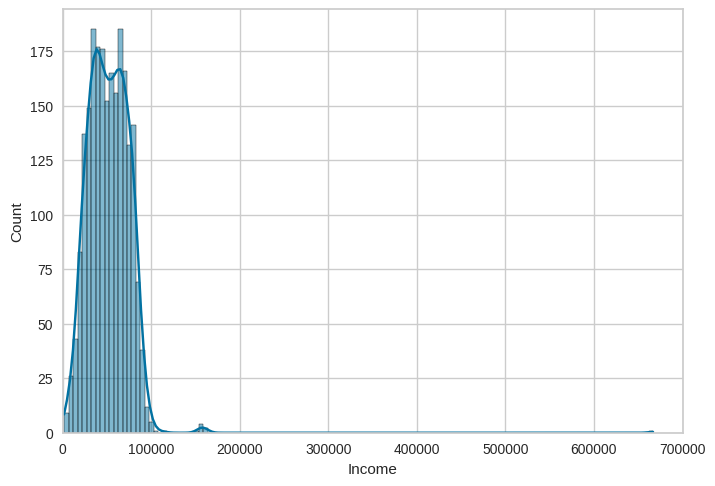

In [ ]:
sns.histplot(data=dr, x='Income', kde=True)
plt.xlim(0,700000)

We knew that the max of the income was somewhere close to 700K which is why for our histogram plot we set the x axis limit to that value. Despite being accurate, pictorially this isn't the easiest plot to interepret because of that one outlier. So let us zoom is on plot minus the outlier.

If we want to zoom in on Income:

(0.0, 200000.0)

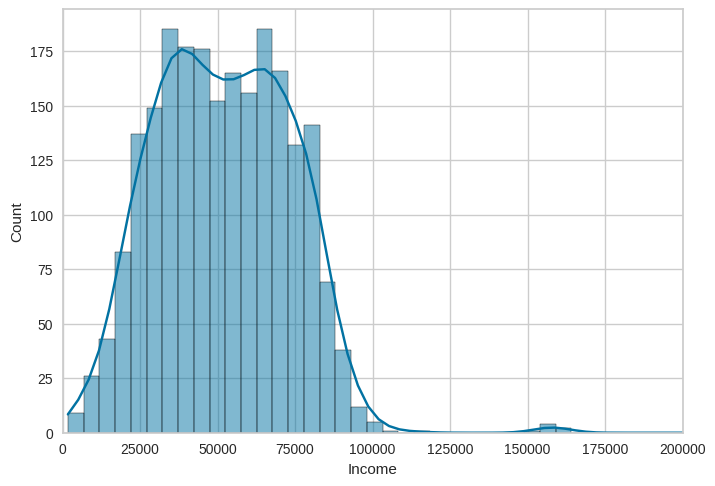

In [ ]:
sns.histplot(data=dr, x='Income',kde=True)
plt.xlim(0,200000)

This is much easier to interpret and the distribution is cleaerer and interestingly enough it looks similar to something bimodal.

<Axes: xlabel='Income'>

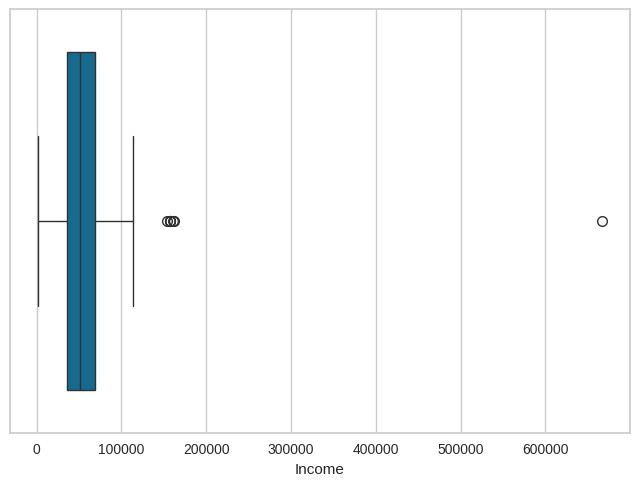

In [ ]:
sns.boxplot(data=dr, x='Income')

Again we have the same issue with our boxplot, the outlier is mkaing it difficult to inrerpret so we will adjust our x axis:

(0.0, 200000.0)

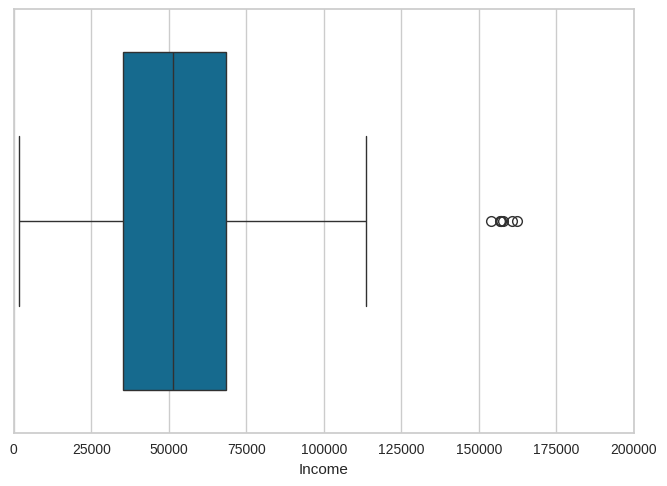

In [ ]:
sns.boxplot(data=dr, x='Income')
plt.xlim(0,200000)

From here I can interpret a few things about my income, that the mean is somewehre around 50000 which actually agrees with our earlier calculation! 25% of the income falls before the lower quartile which appears to be around 37000. 75% of the income falls before the upper quartile which seems to be around 112000. The shape of this boxplot also tells us the distribution isn't skewed, it's normal which agrees with our histogram.

(1891.0, 1998.0)

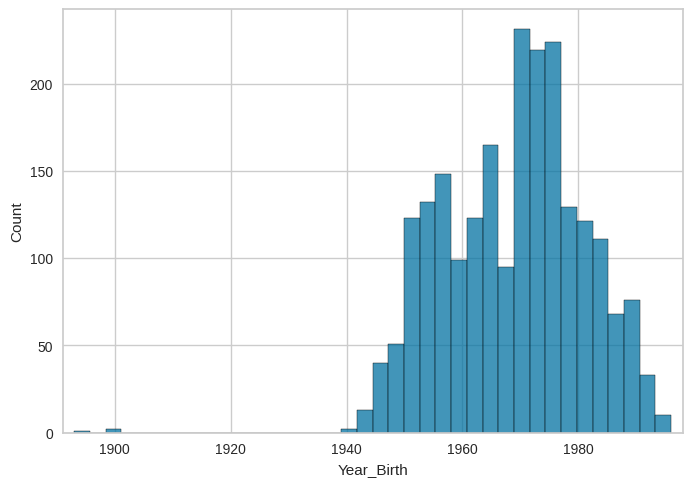

In [ ]:
sns.histplot(data=dr, x='Year_Birth')
plt.xlim(dr.Year_Birth.min()-2,dr.Year_Birth.max()+2)

<Axes: xlabel='Year_Birth'>

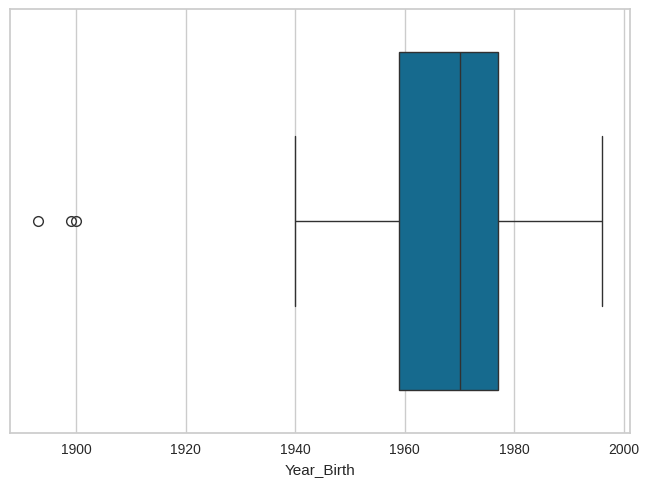

In [ ]:
sns.boxplot(data=dr, x='Year_Birth')

We seem to have more of a negative skew with the birth year distribution

<Axes: xlabel='Education', ylabel='count'>

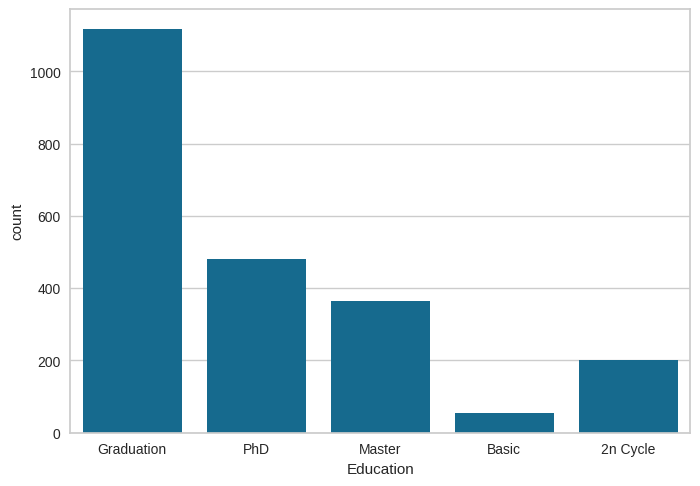

In [ ]:
sns.countplot(data=dr, x='Education')

From the bar graph above it appears that our customer data base is very educated, with PhD's being the second most prevalent group.

<Axes: xlabel='Marital_Status', ylabel='count'>

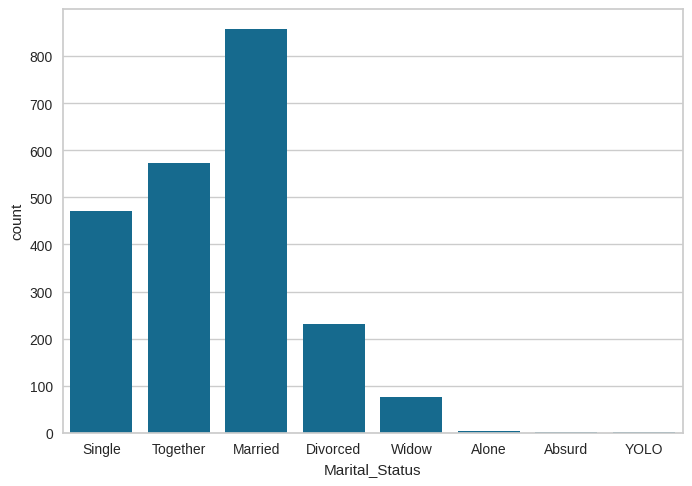

In [ ]:
sns.countplot(data=dr, x='Marital_Status')

A lot of the clientelle is married or in a relationship. Depsite that, a good portion are single.

<Axes: xlabel='Kidhome', ylabel='count'>

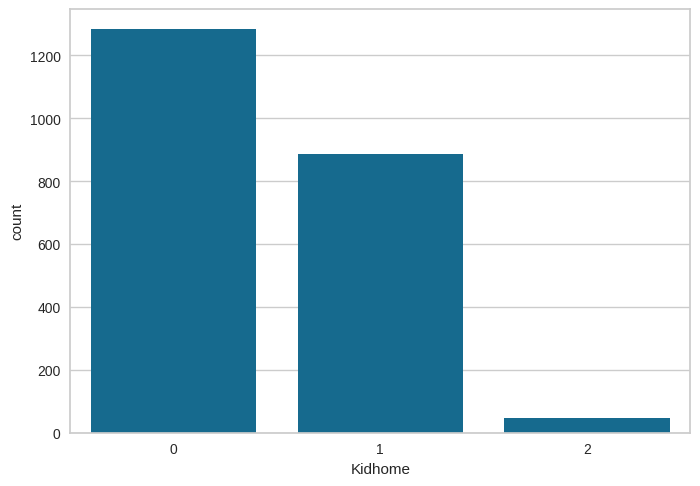

In [ ]:
sns.countplot(data=dr, x='Kidhome')

Again, it's quite clear from the data that most of the customers have one or no kisd at home.

<Axes: xlabel='Teenhome', ylabel='count'>

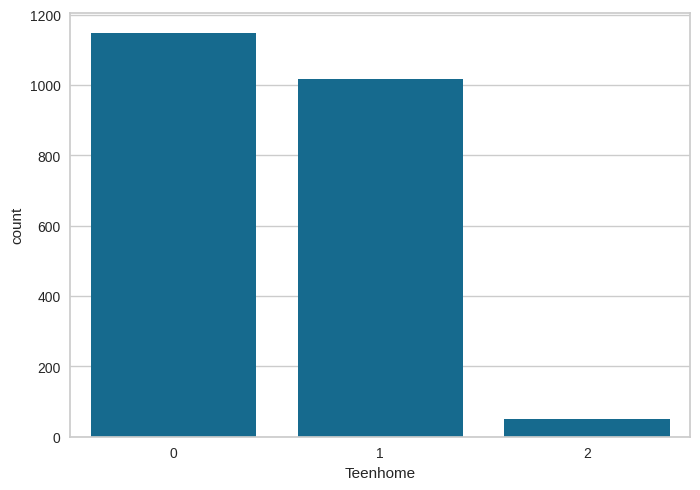

In [ ]:
sns.countplot(data=dr, x='Teenhome')

Now we want to check the distribution of the variable Dt_Customer, which is the date when a customer enrolled with the company. First we will convert this column in the data to datetime format in order to manipuate it more efficiently.


In [ ]:
dr['Dt_Customer']  = pd.to_datetime(dr['Dt_Customer'],dayfirst=True)

In [ ]:
dr['Dt_Customer'].dt.year

0       2012
1       2014
2       2013
3       2014
4       2014
        ... 
2235    2013
2236    2014
2237    2014
2238    2014
2239    2012
Name: Dt_Customer, Length: 2216, dtype: int32

It's not realistic to make a bar graph for each exact date so it might make more practical sense to make one for year and for month

In [ ]:
dr2 = dr.copy()

In [ ]:
dr2['Dt_Customer'].dt.year

0       2012
1       2014
2       2013
3       2014
4       2014
        ... 
2235    2013
2236    2014
2237    2014
2238    2014
2239    2012
Name: Dt_Customer, Length: 2216, dtype: int32

In [ ]:
dr2['yearEn'] = dr2['Dt_Customer'].dt.year

<Axes: xlabel='yearEn', ylabel='count'>

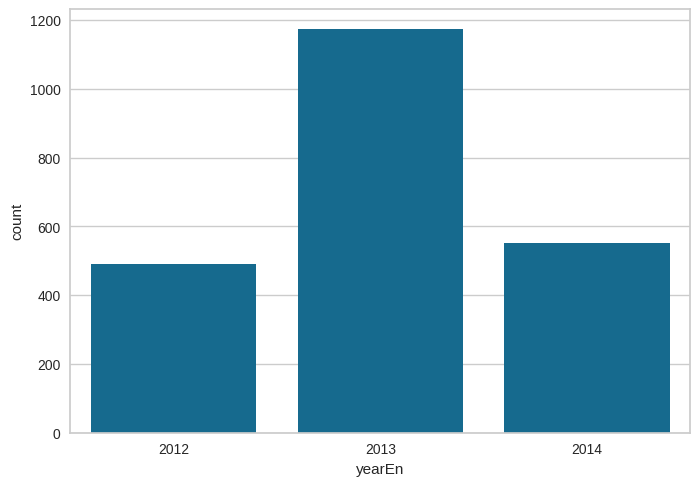

In [ ]:
sns.countplot(data=dr2, x= 'yearEn')

So now this gives me a lot of more insight - this clearly indicates that 2013 was a very good year with lots of customers enrolling.

In [ ]:
dr2['Dt_Customer'].dt.month

0        9
1        3
2        8
3        2
4        1
        ..
2235     6
2236     6
2237     1
2238     1
2239    10
Name: Dt_Customer, Length: 2216, dtype: int32

In [ ]:
dr2['monthEn'] = dr2['Dt_Customer'].dt.month

<Axes: xlabel='monthEn', ylabel='count'>

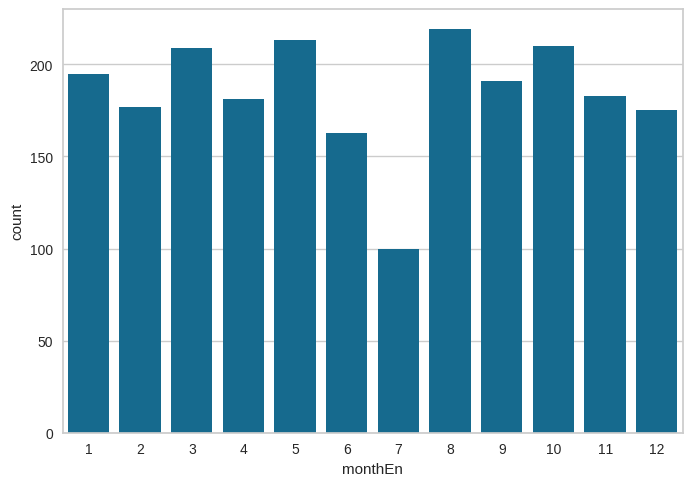

In [ ]:
sns.countplot(data=dr2, x= 'monthEn')

This bar graph is also important because despite negelcting to account for the specific year, seasonal trends are sometimes more important to look at than what happened in a specific year. From here, I can see that customer enrollment around July was the worst.

<Axes: xlabel='monthEn'>

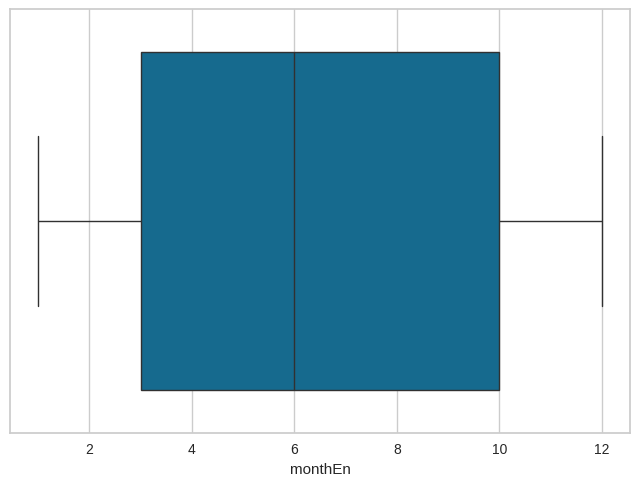

In [ ]:
sns.boxplot(data=dr2, x='monthEn')

<Axes: xlabel='Recency', ylabel='Count'>

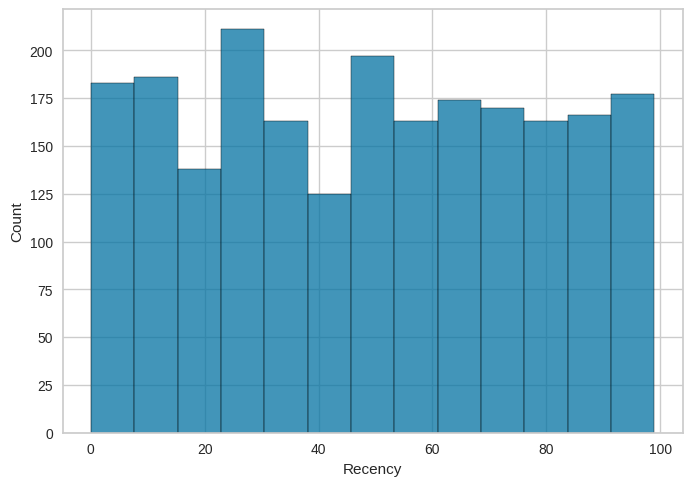

In [ ]:
sns.histplot(data=dr, x= 'Recency')

The recency data is interesting - it's not skewed which is not bad but it's not necessaily good either. The amount of people that bought something a while ago is roughly the same as people who bought something recently - we'd obviously like it if this data was right skewed i.e. most of our customers had a very recent purchase.

<Axes: xlabel='Recency'>

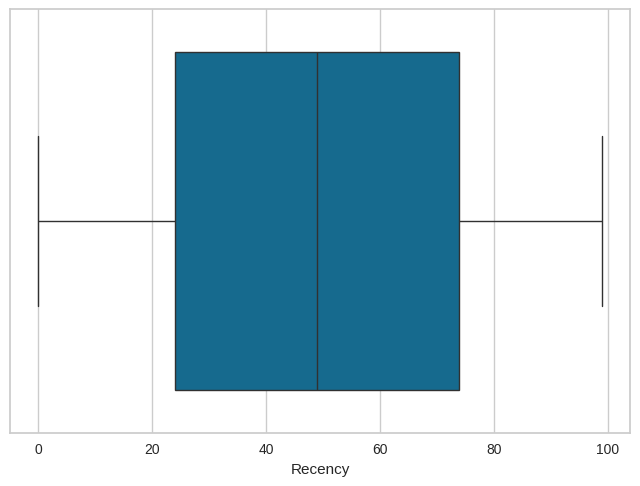

In [ ]:
sns.boxplot(data=dr, x='Recency')

<Axes: xlabel='Complain', ylabel='count'>

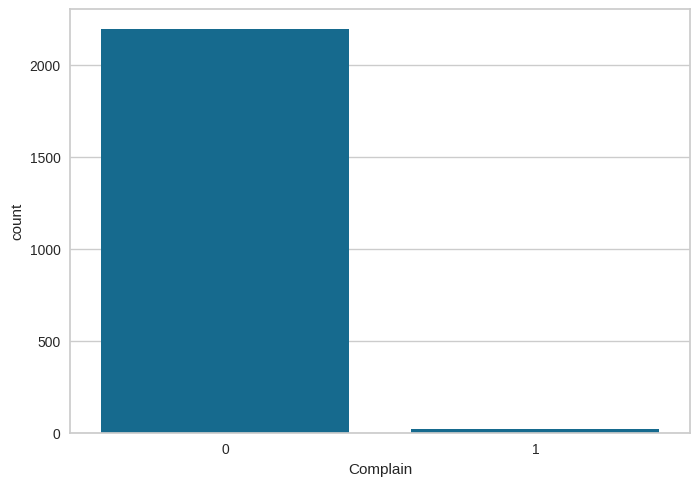

In [ ]:
sns.countplot(data=dr, x= 'Complain')

<Axes: xlabel='MntWines', ylabel='Count'>

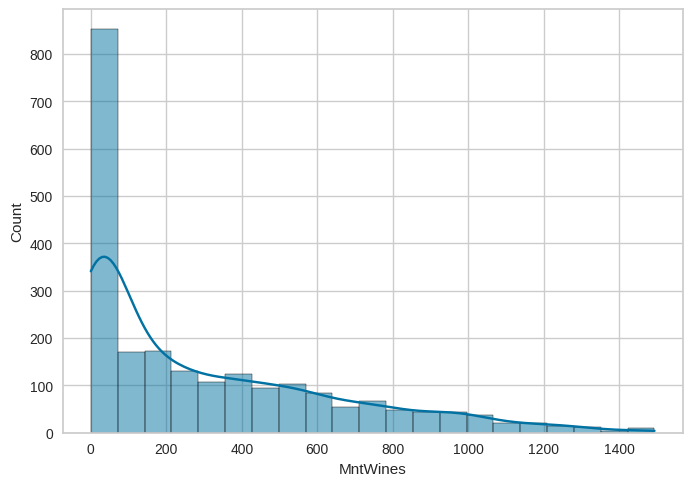

In [ ]:
sns.histplot(data=dr, x= 'MntWines', kde = True)

This might indicate a healthy trend on our customes since the data is right skewed - less and less of our clients spend more on alcohol.

<Axes: xlabel='MntWines'>

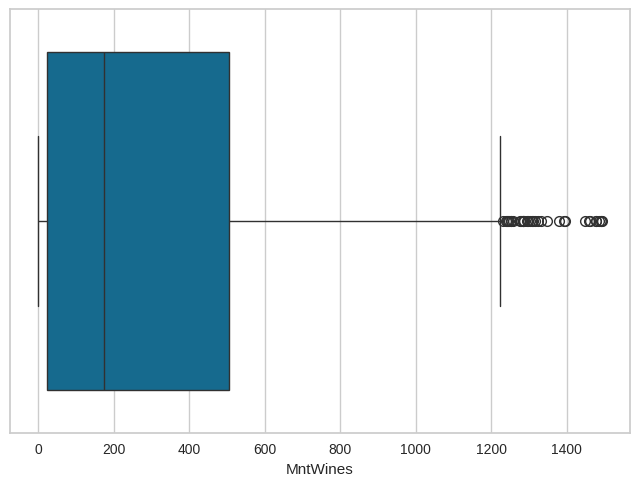

In [ ]:
sns.boxplot(data=dr, x='MntWines')

<Axes: xlabel='MntFruits', ylabel='Count'>

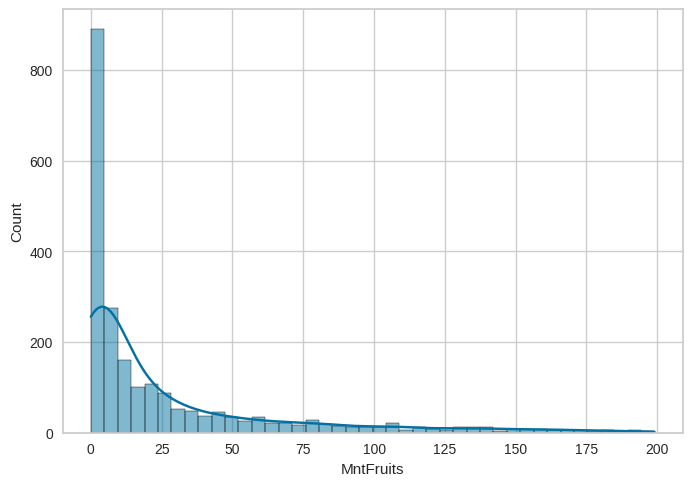

In [ ]:
sns.histplot(data=dr, x= 'MntFruits', kde = True)

<Axes: xlabel='MntFruits'>

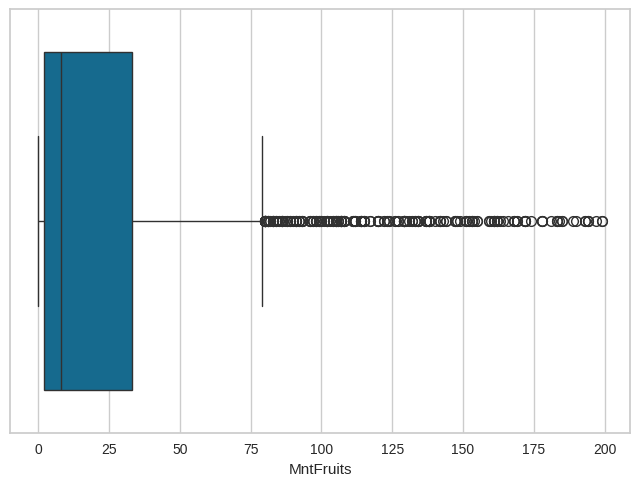

In [ ]:
sns.boxplot(data=dr, x='MntFruits')

<Axes: xlabel='MntMeatProducts', ylabel='Count'>

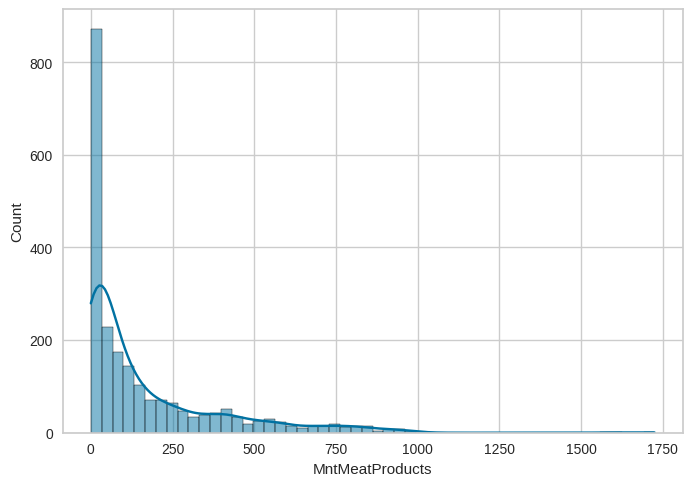

In [ ]:
sns.histplot(data=dr, x= 'MntMeatProducts', kde = True)

<Axes: xlabel='MntMeatProducts'>

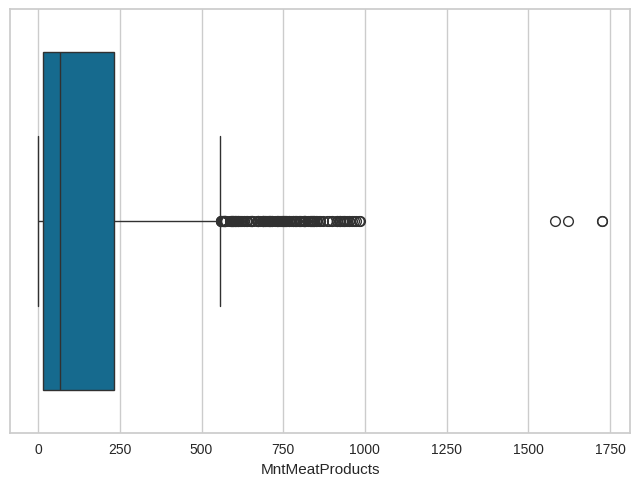

In [ ]:
sns.boxplot(data=dr, x='MntMeatProducts')

<Axes: xlabel='MntFishProducts', ylabel='Count'>

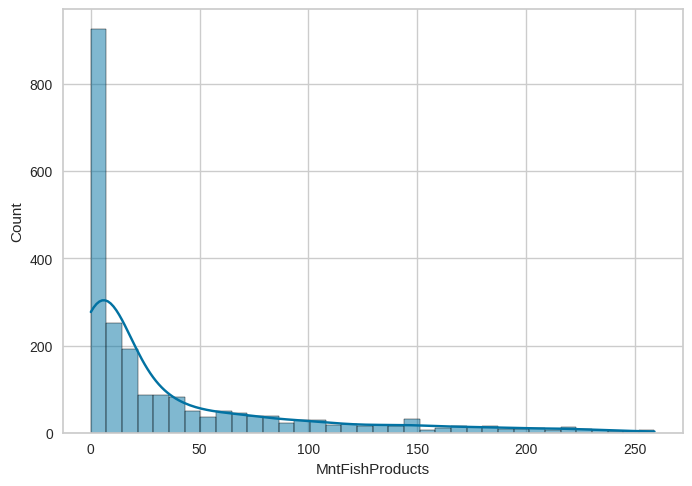

In [ ]:
sns.histplot(data=dr, x= 'MntFishProducts', kde = True)

<Axes: xlabel='MntFishProducts'>

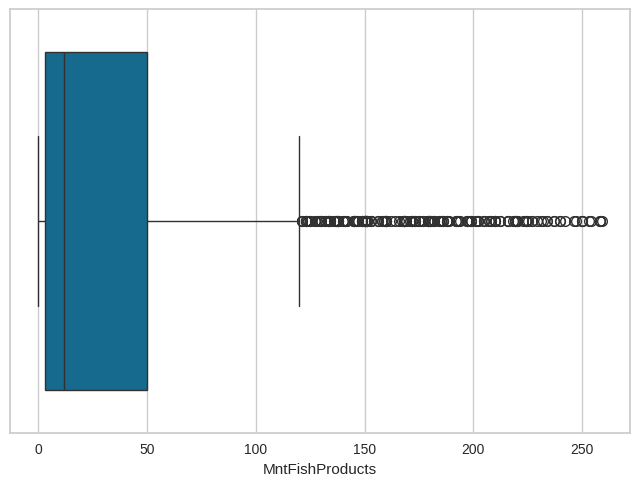

In [ ]:
sns.boxplot(data=dr, x='MntFishProducts')

<Axes: xlabel='MntSweetProducts', ylabel='Count'>

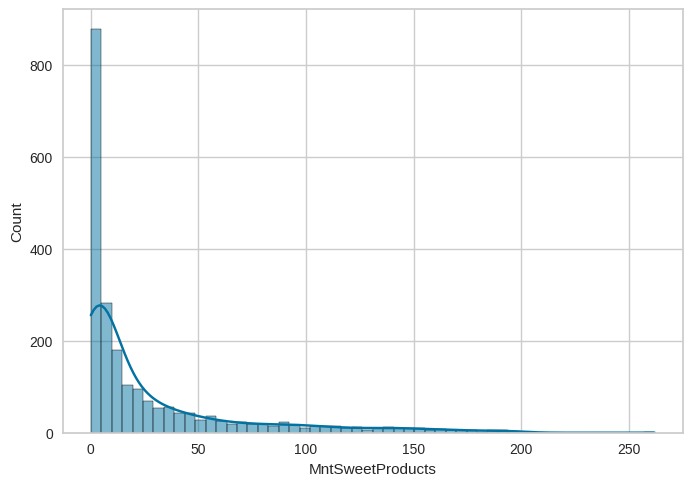

In [ ]:
sns.histplot(data=dr, x= 'MntSweetProducts', kde = True)

(0.0, 100.0)

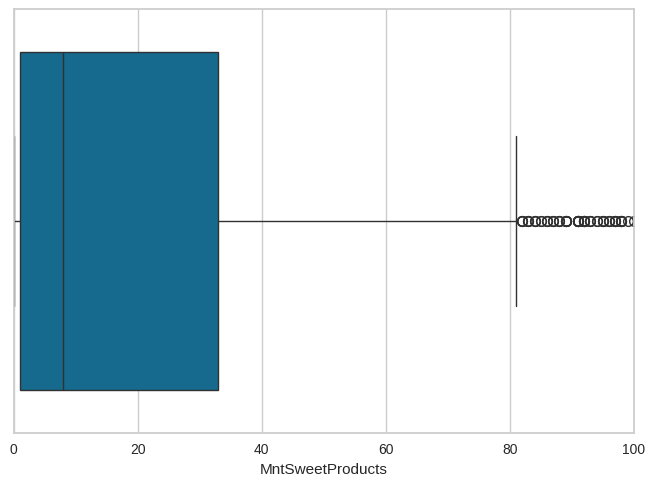

In [ ]:
sns.boxplot(data=dr, x='MntSweetProducts')
plt.xlim(0,100)

<Axes: xlabel='MntGoldProds', ylabel='Count'>

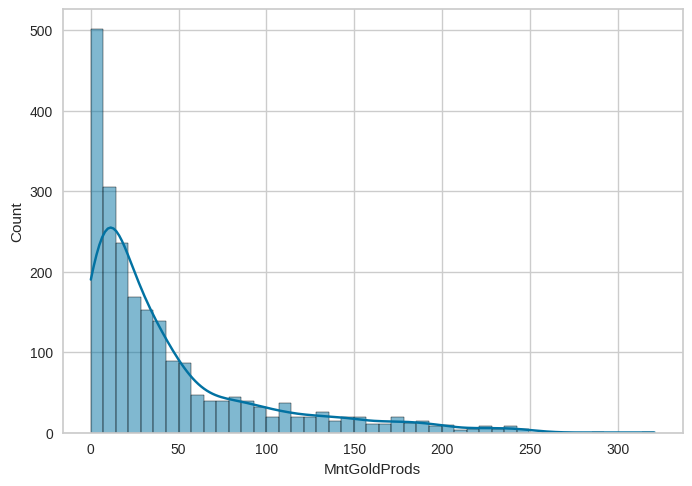

In [ ]:
sns.histplot(data=dr, x= 'MntGoldProds', kde = True)

<Axes: xlabel='MntGoldProds'>

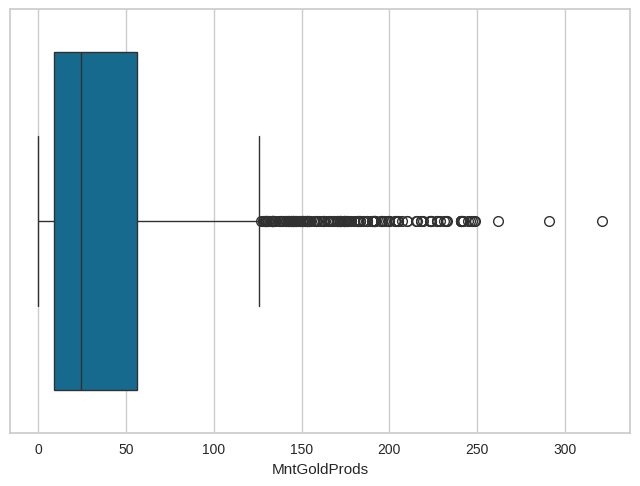

In [ ]:
sns.boxplot(data=dr, x='MntGoldProds')

Interestingly enough it seems form wine to meat to fish to sweets and gold the dsitributions are very similar.

<Axes: xlabel='NumDealsPurchases', ylabel='count'>

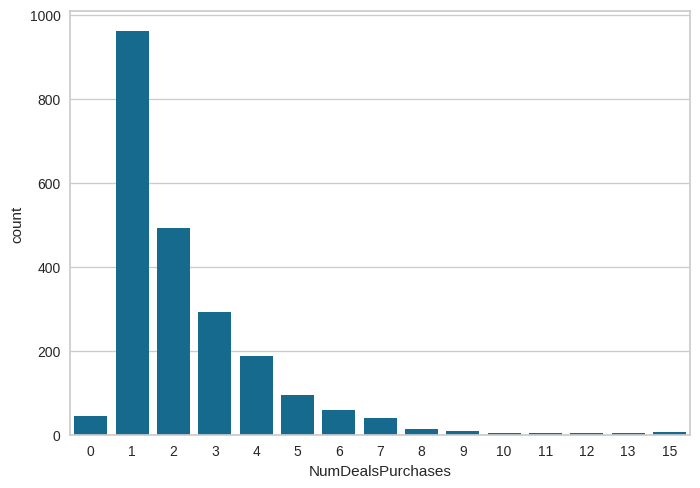

In [ ]:
sns.countplot(data=dr, x= 'NumDealsPurchases')

This tells us that clearly the dsicounts are a great incentive to get customers to buy at least one or two items

<Axes: xlabel='NumDealsPurchases'>

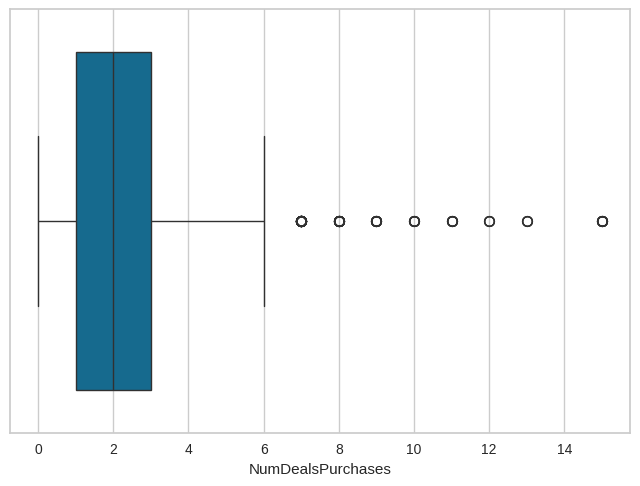

In [ ]:
sns.boxplot(data=dr, x='NumDealsPurchases')

<Axes: xlabel='AcceptedCmp1', ylabel='count'>

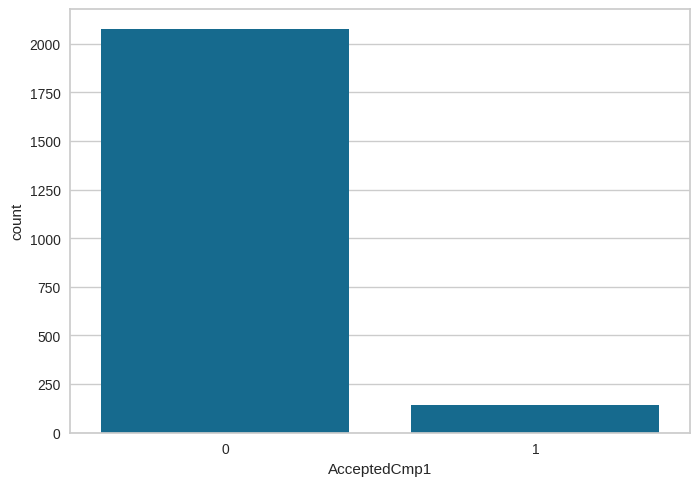

In [ ]:
sns.countplot(data=dr, x= 'AcceptedCmp1')

<Axes: xlabel='AcceptedCmp2', ylabel='count'>

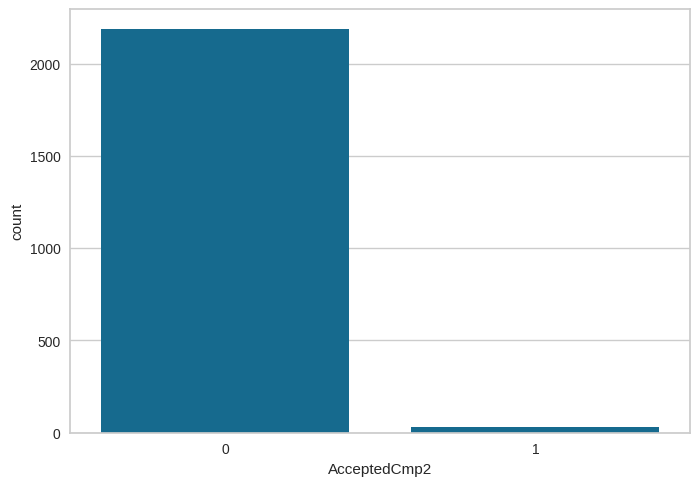

In [ ]:
sns.countplot(data=dr, x= 'AcceptedCmp2')

<Axes: xlabel='AcceptedCmp3', ylabel='count'>

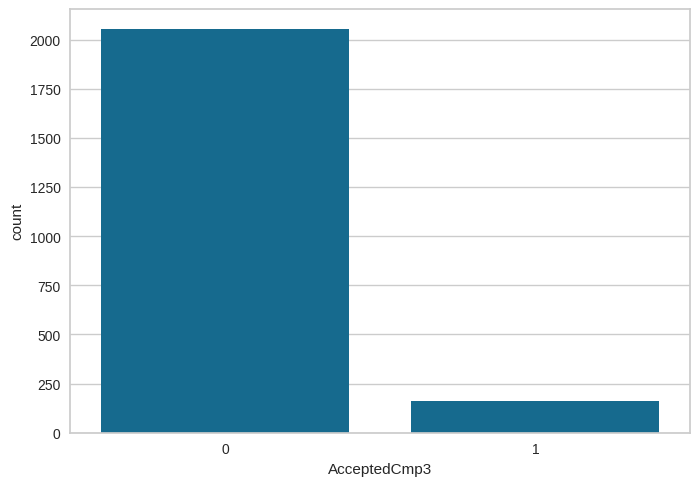

In [ ]:
sns.countplot(data=dr, x= 'AcceptedCmp3')

<Axes: xlabel='AcceptedCmp4', ylabel='count'>

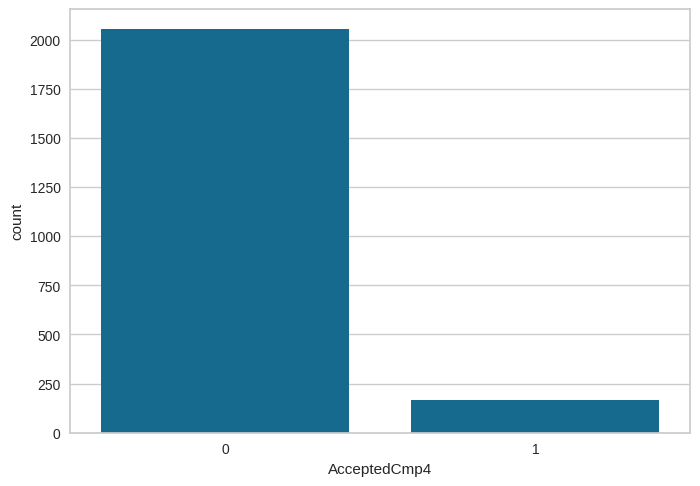

In [ ]:
sns.countplot(data=dr, x= 'AcceptedCmp4')

<Axes: xlabel='AcceptedCmp5', ylabel='count'>

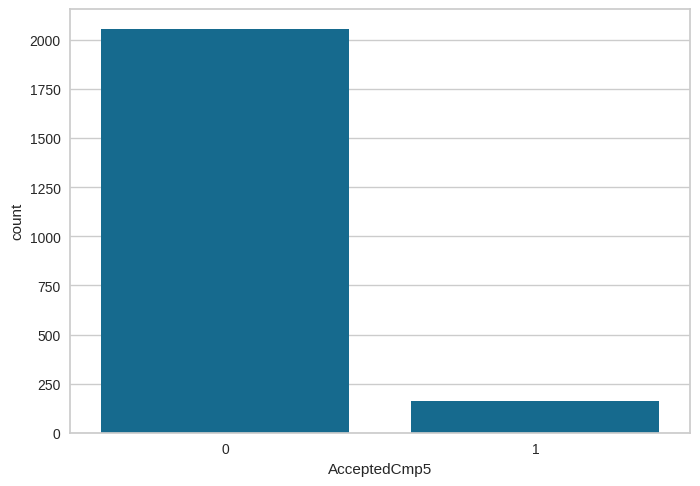

In [ ]:
sns.countplot(data=dr, x= 'AcceptedCmp5')

<Axes: xlabel='Response', ylabel='count'>

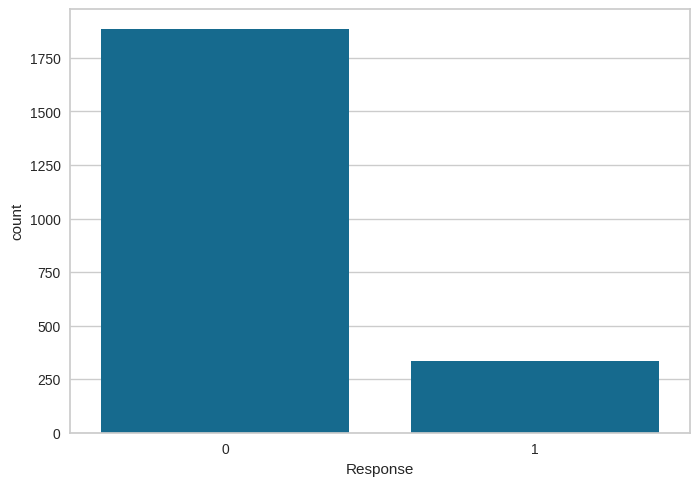

In [ ]:
sns.countplot(data=dr, x= 'Response')

The past few bar graphs seem to indicate that the Ad campaigns don't seem to be working all that well.

<Axes: xlabel='NumWebPurchases', ylabel='count'>

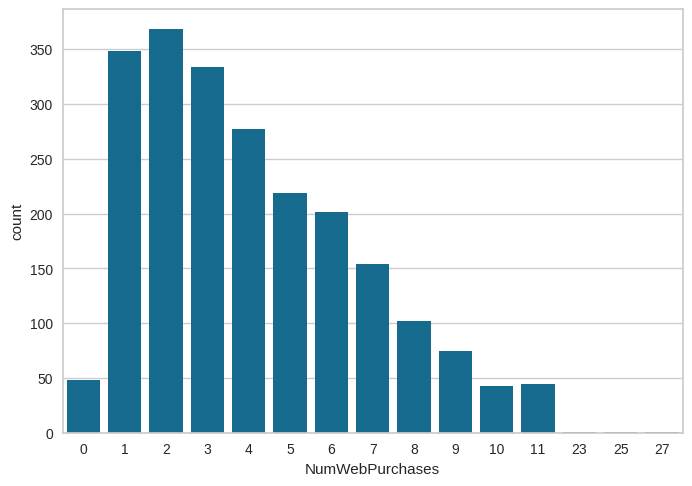

In [ ]:
sns.countplot(data=dr, x= 'NumWebPurchases')

<Axes: xlabel='NumWebPurchases'>

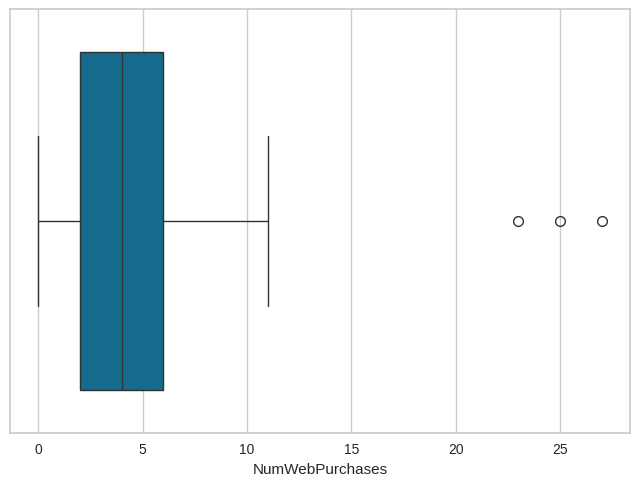

In [ ]:
sns.boxplot(data=dr, x='NumWebPurchases')

<Axes: xlabel='NumCatalogPurchases', ylabel='count'>

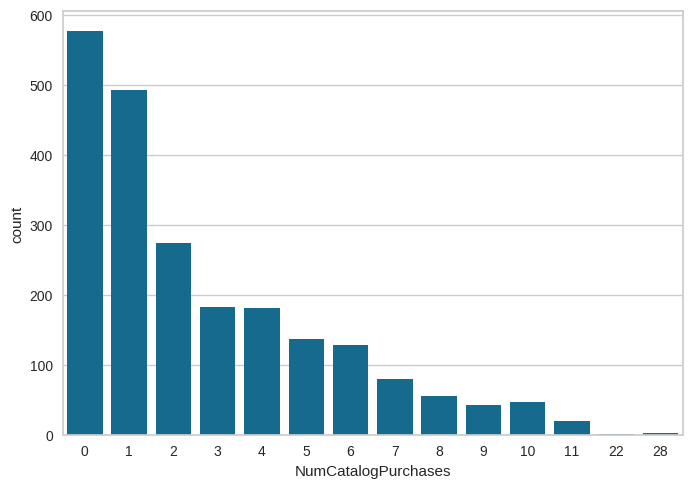

In [ ]:
sns.countplot(data=dr, x= 'NumCatalogPurchases')

<Axes: xlabel='NumCatalogPurchases'>

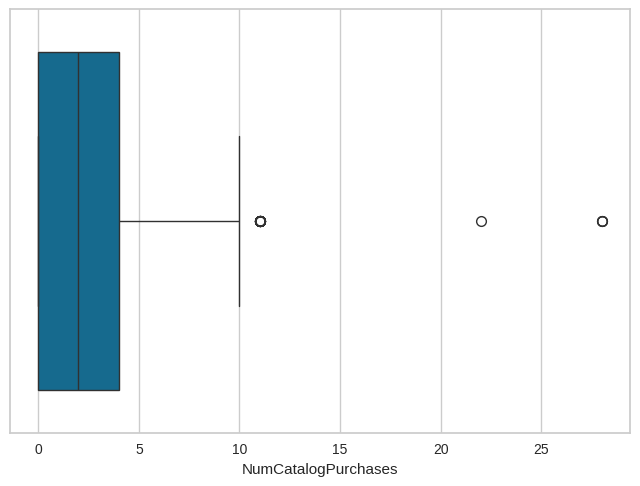

In [ ]:
sns.boxplot(data=dr, x='NumCatalogPurchases')

<Axes: xlabel='NumStorePurchases', ylabel='count'>

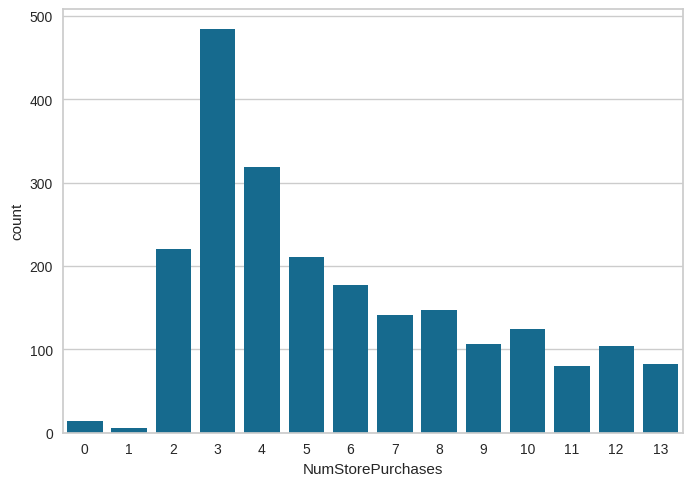

In [ ]:
sns.countplot(data=dr, x= 'NumStorePurchases')

<Axes: xlabel='NumStorePurchases'>

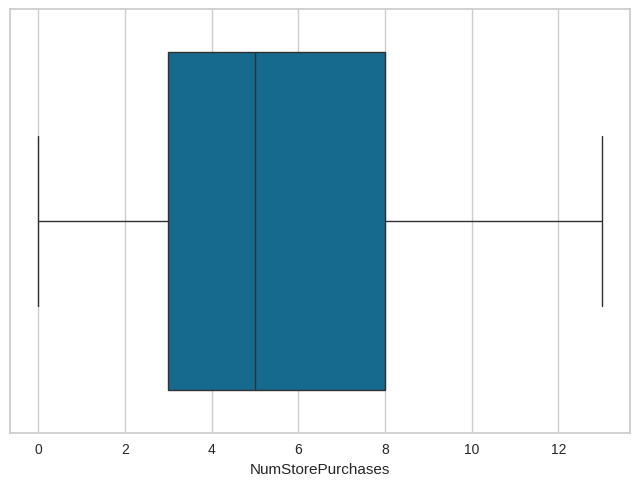

In [ ]:
sns.boxplot(data=dr, x='NumStorePurchases')

<Axes: xlabel='NumWebVisitsMonth', ylabel='count'>

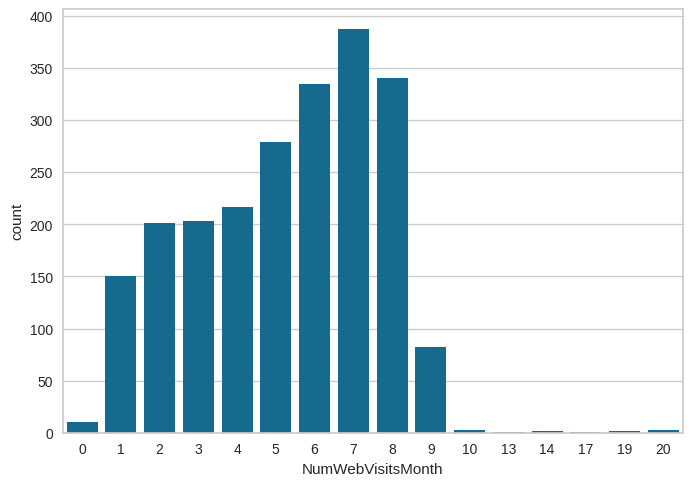

In [ ]:
sns.countplot(data=dr, x= 'NumWebVisitsMonth')

This is very pleasing to see as overall there is an upward trend of the number of times customers visited the wbesite in the last month

<Axes: xlabel='NumWebVisitsMonth'>

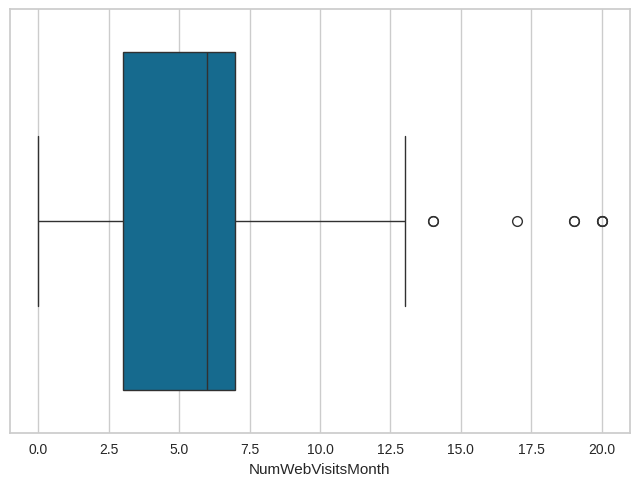

In [ ]:
sns.boxplot(data=dr, x='NumWebVisitsMonth')

### Bivariate Analysis

#### Perform multivariate analysis to explore the relationsips between the variables.

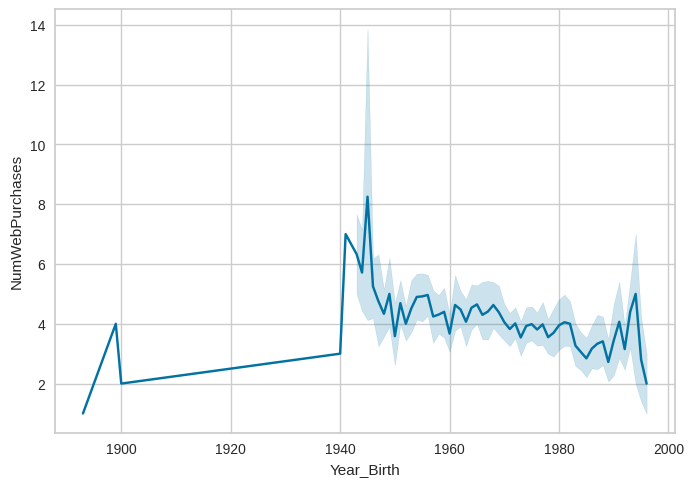

In [ ]:
sns.lineplot(data = dr , x = 'Year_Birth' , y = 'NumWebPurchases');

Interesitngly enough you might expect that the line plot above should steadily increase given the younger generation but that's not necessarily the case

(0.0, 200000.0)

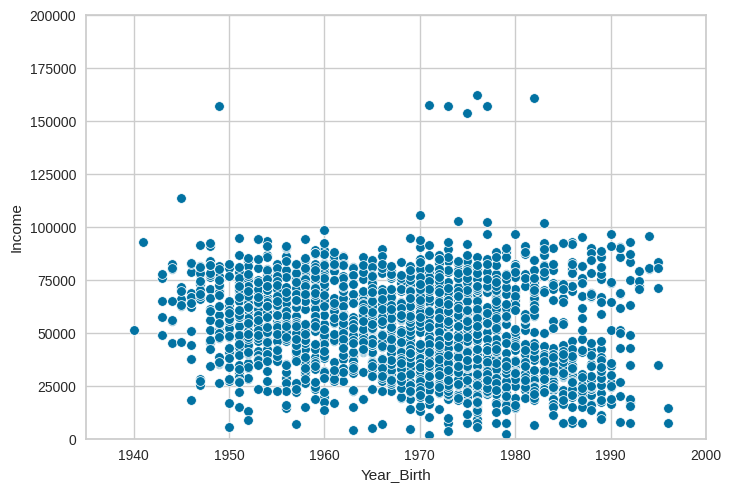

In [ ]:
sns.scatterplot(data=dr, x='Year_Birth', y='Income');
plt.xlim(1935,2000)
plt.ylim(0,200000)

<Axes: xlabel='Education', ylabel='Income'>

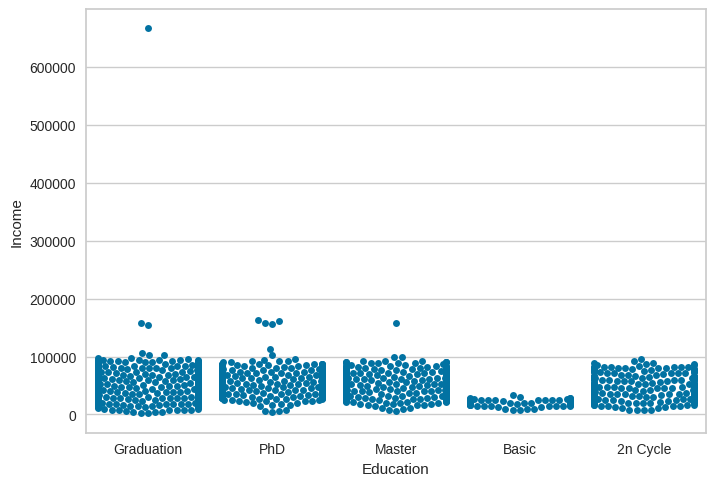

In [ ]:
sns.swarmplot(data=dr, x='Education', y='Income')

(0.0, 175000.0)

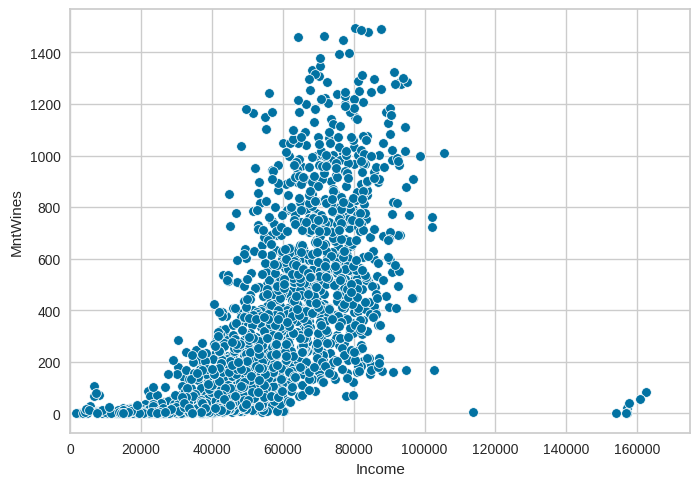

In [ ]:
sns.scatterplot(data=dr, x='Income', y='MntWines');
plt.xlim(0,175000)

(0.0, 175000.0)

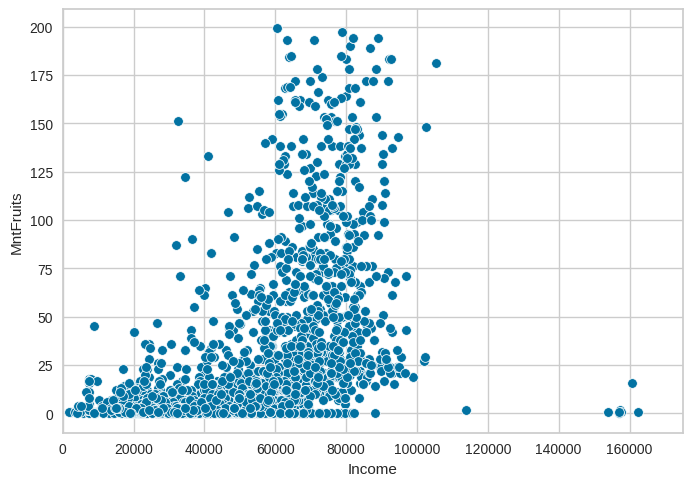

In [ ]:
sns.scatterplot(data=dr, x='Income', y='MntFruits');
plt.xlim(0,175000)

(0.0, 175000.0)

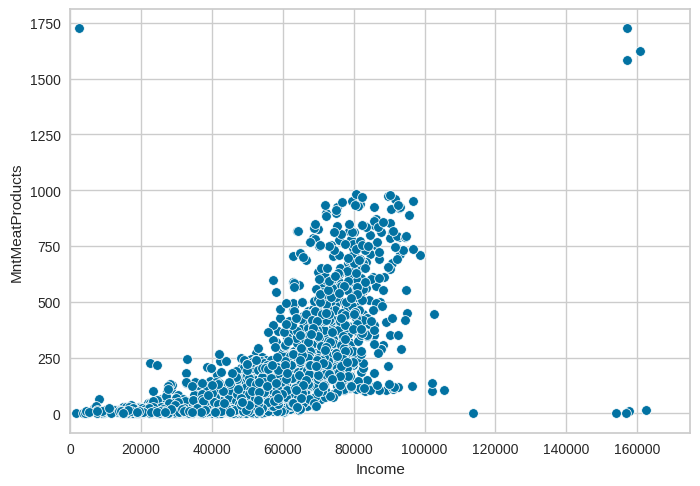

In [ ]:
sns.scatterplot(data=dr, x='Income', y='MntMeatProducts');
plt.xlim(0,175000)

(0.0, 175000.0)

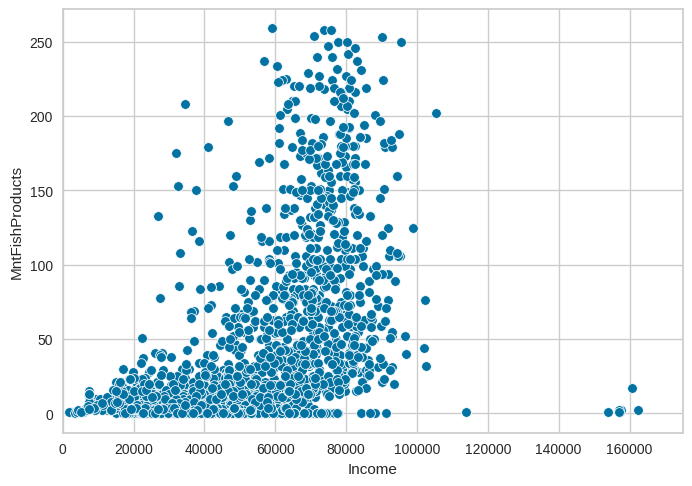

In [ ]:
sns.scatterplot(data=dr, x='Income', y='MntFishProducts');
plt.xlim(0,175000)

(0.0, 175000.0)

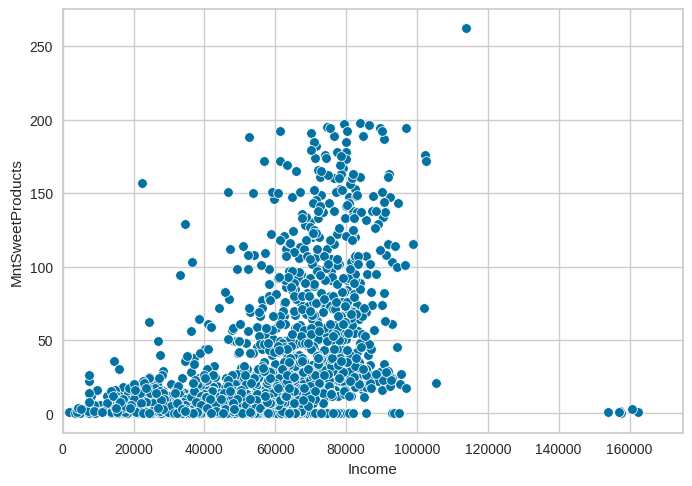

In [ ]:
sns.scatterplot(data=dr, x='Income', y='MntSweetProducts');
plt.xlim(0,175000)

(0.0, 175000.0)

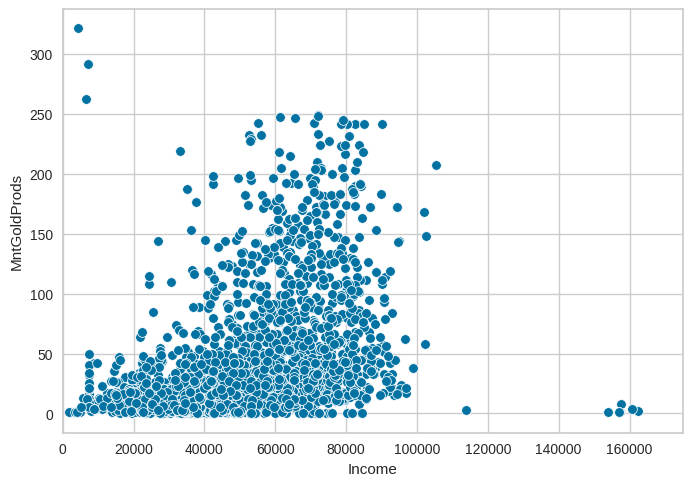

In [ ]:
sns.scatterplot(data=dr, x='Income', y='MntGoldProds');
plt.xlim(0,175000)

The last 5 graphs indicate a positive correlation

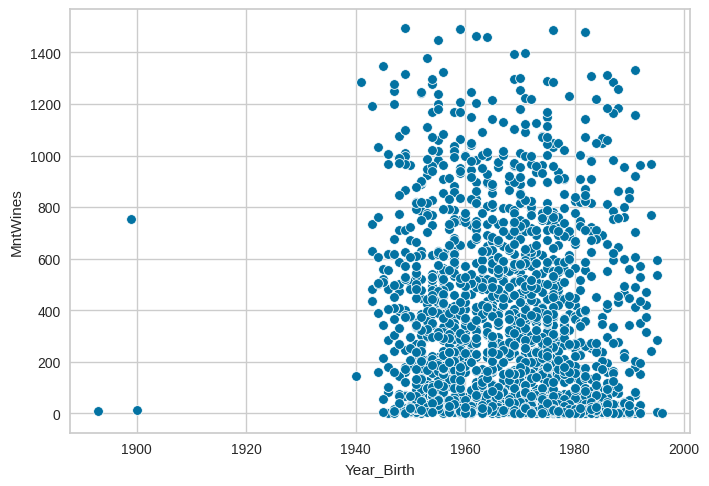

In [ ]:
sns.scatterplot(data=dr, x='Year_Birth', y='MntWines');

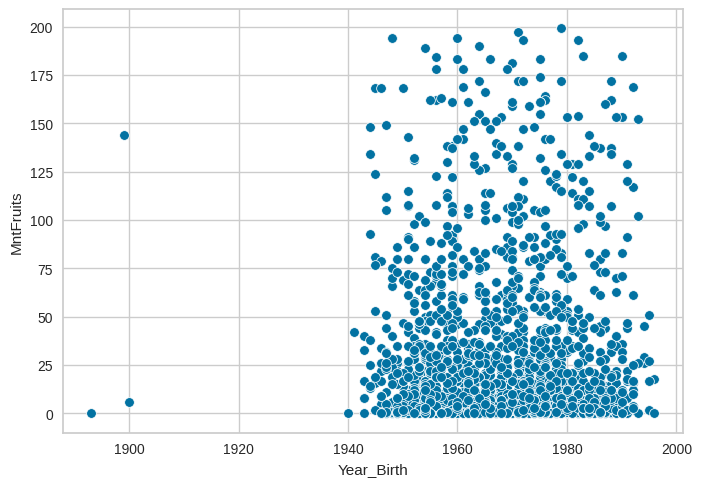

In [ ]:
sns.scatterplot(data=dr, x='Year_Birth', y='MntFruits');

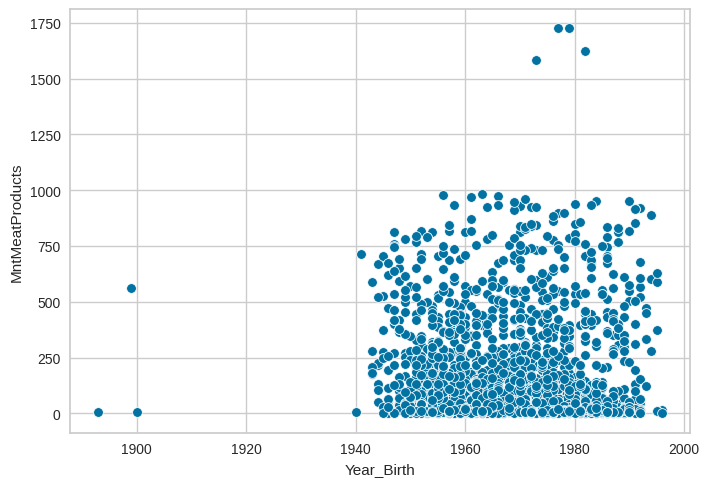

In [ ]:
sns.scatterplot(data=dr, x='Year_Birth', y='MntMeatProducts');

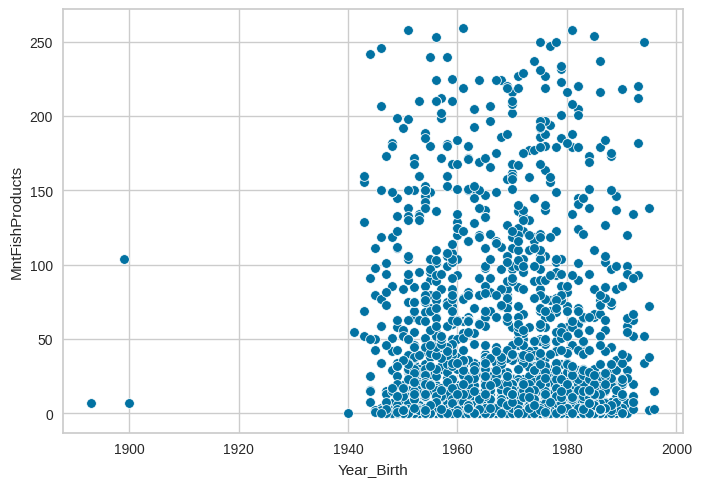

In [ ]:
sns.scatterplot(data=dr, x='Year_Birth', y='MntFishProducts');

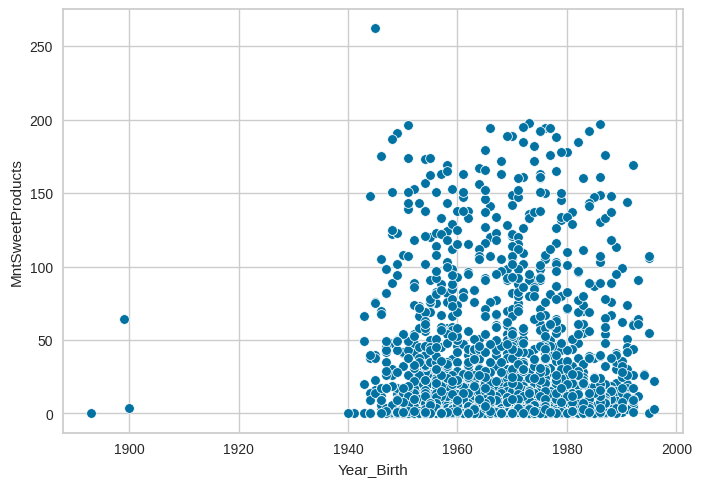

In [ ]:
sns.scatterplot(data=dr, x='Year_Birth', y='MntSweetProducts');

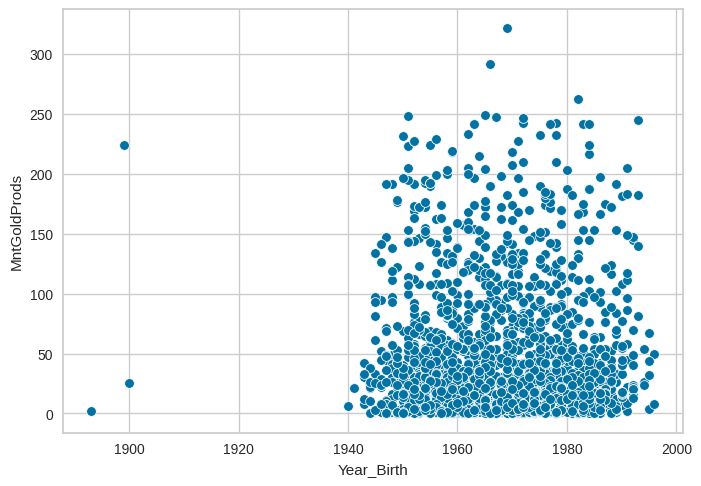

In [ ]:
sns.scatterplot(data=dr, x='Year_Birth', y='MntGoldProds');

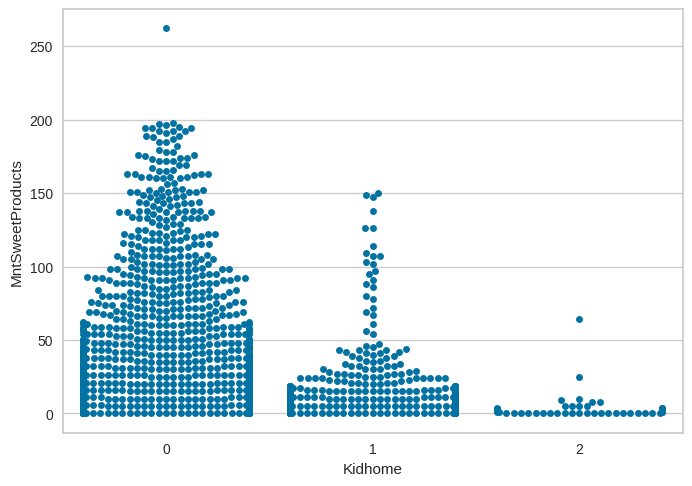

In [ ]:
sns.swarmplot(data=dr, x='Kidhome', y='MntSweetProducts');

This is a funny interesting swarm plot because it indicates that max amount of sweets bought in a household for more kids or for more teens, below, is less than that of a household with no children - trying to keep a healthy house!

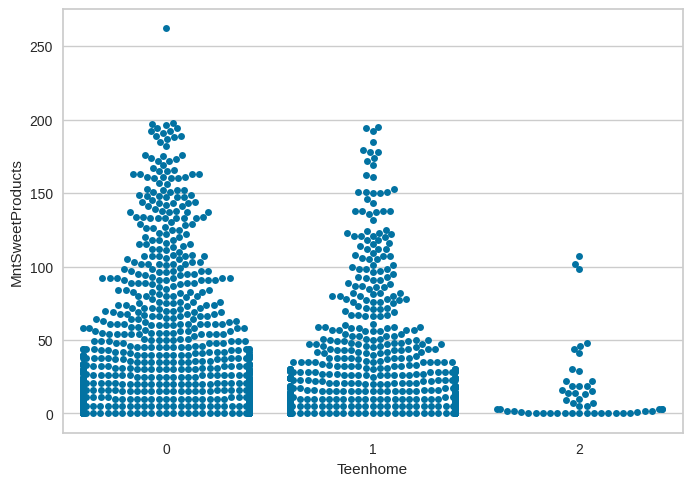

In [ ]:
sns.swarmplot(data=dr, x='Teenhome', y='MntSweetProducts');

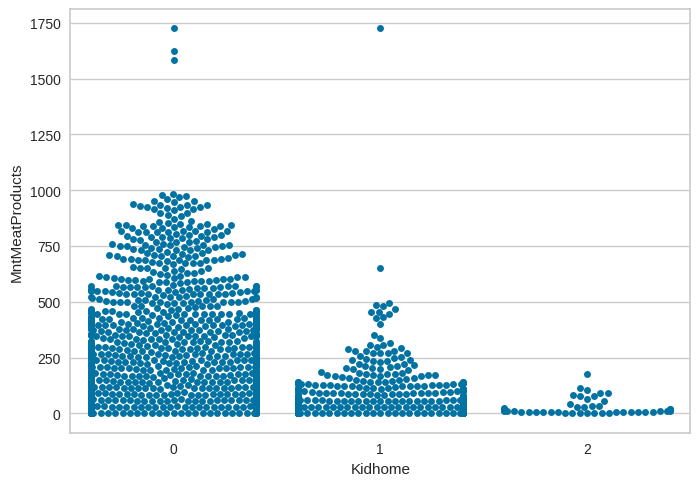

In [ ]:
sns.swarmplot(data=dr, x='Kidhome', y='MntMeatProducts');

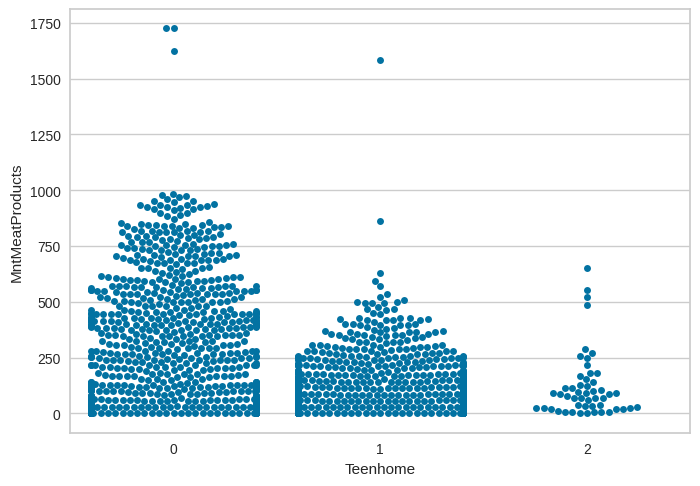

In [ ]:
sns.swarmplot(data=dr, x='Teenhome', y='MntMeatProducts');

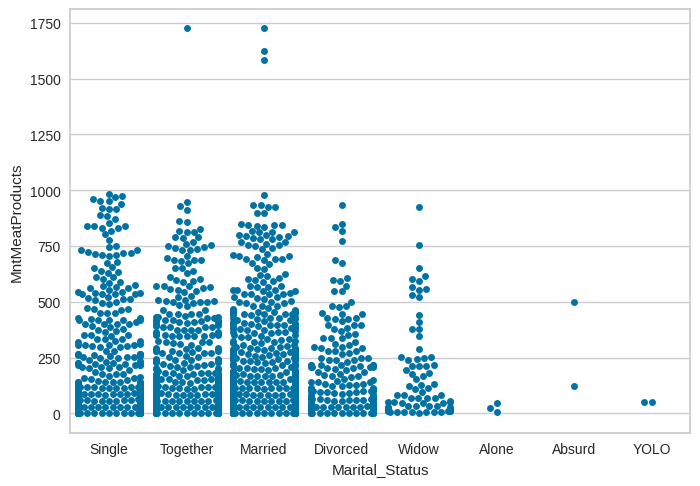

In [ ]:
sns.swarmplot(data=dr, x='Marital_Status', y='MntMeatProducts');

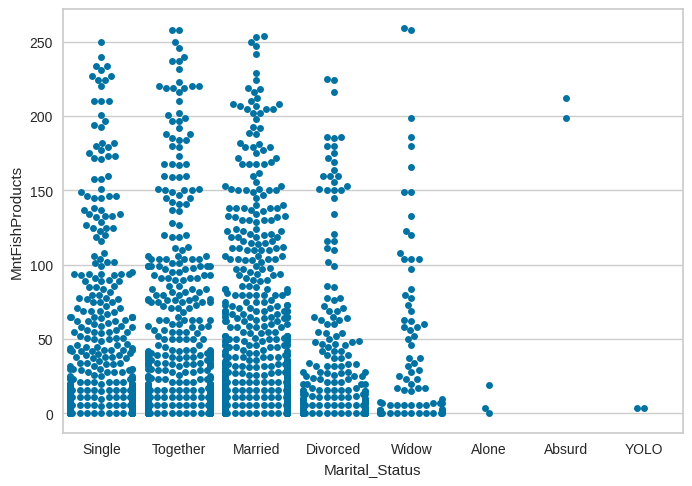

In [ ]:
sns.swarmplot(data=dr, x='Marital_Status', y='MntFishProducts');

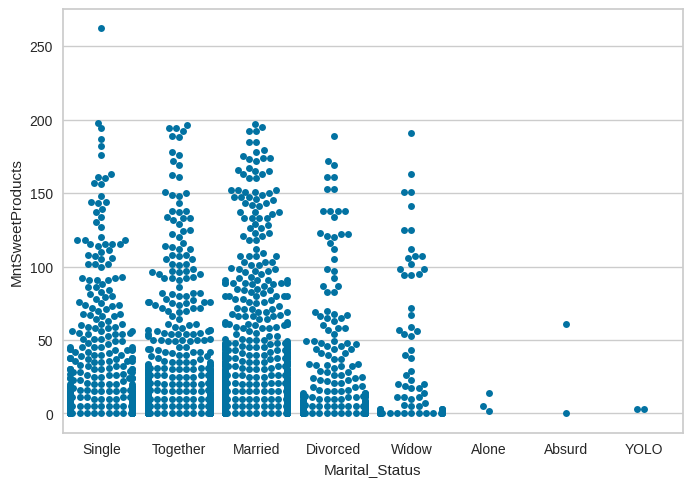

In [ ]:
sns.swarmplot(data=dr, x='Marital_Status', y='MntSweetProducts');

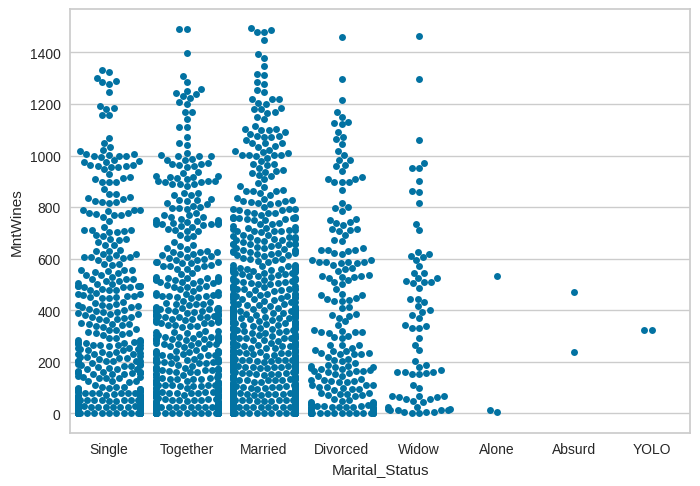

In [ ]:
sns.swarmplot(data=dr, x='Marital_Status', y='MntWines');

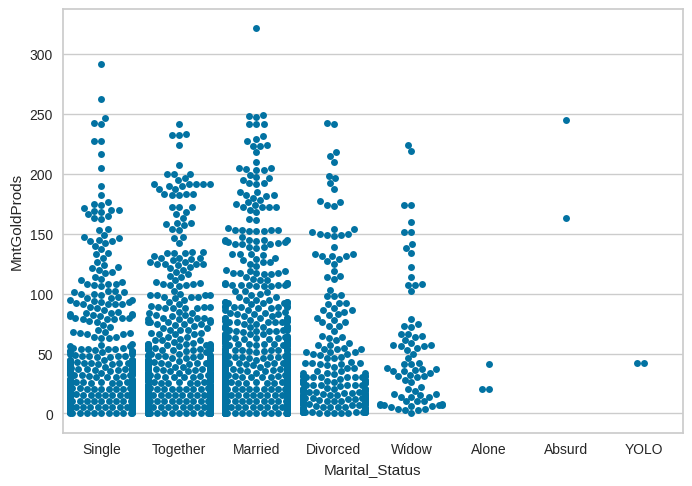

In [ ]:
sns.swarmplot(data=dr, x='Marital_Status', y='MntGoldProds');

(0.0, 200000.0)

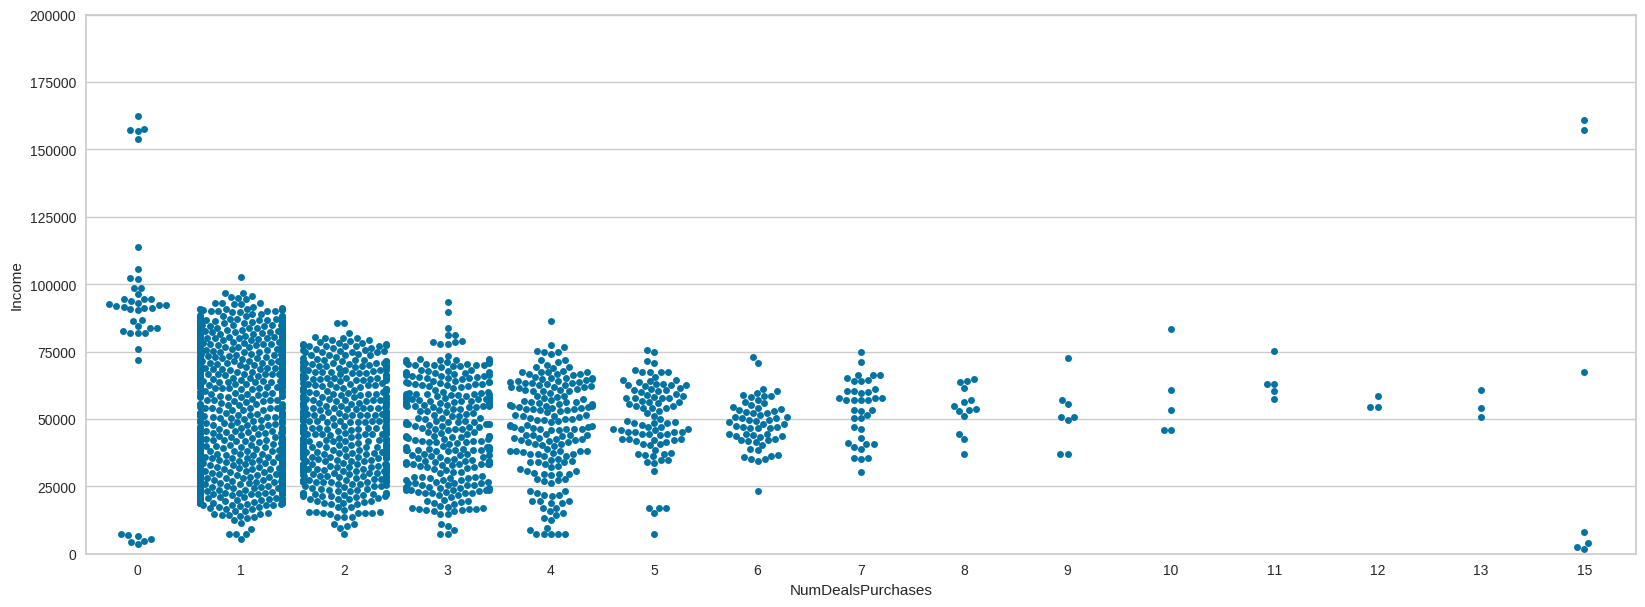

In [ ]:
plt.figure(figsize=(20,7))
sns.swarmplot(data=dr, x='NumDealsPurchases', y = 'Income');
plt.ylim(0,200000)

(0.0, 200000.0)

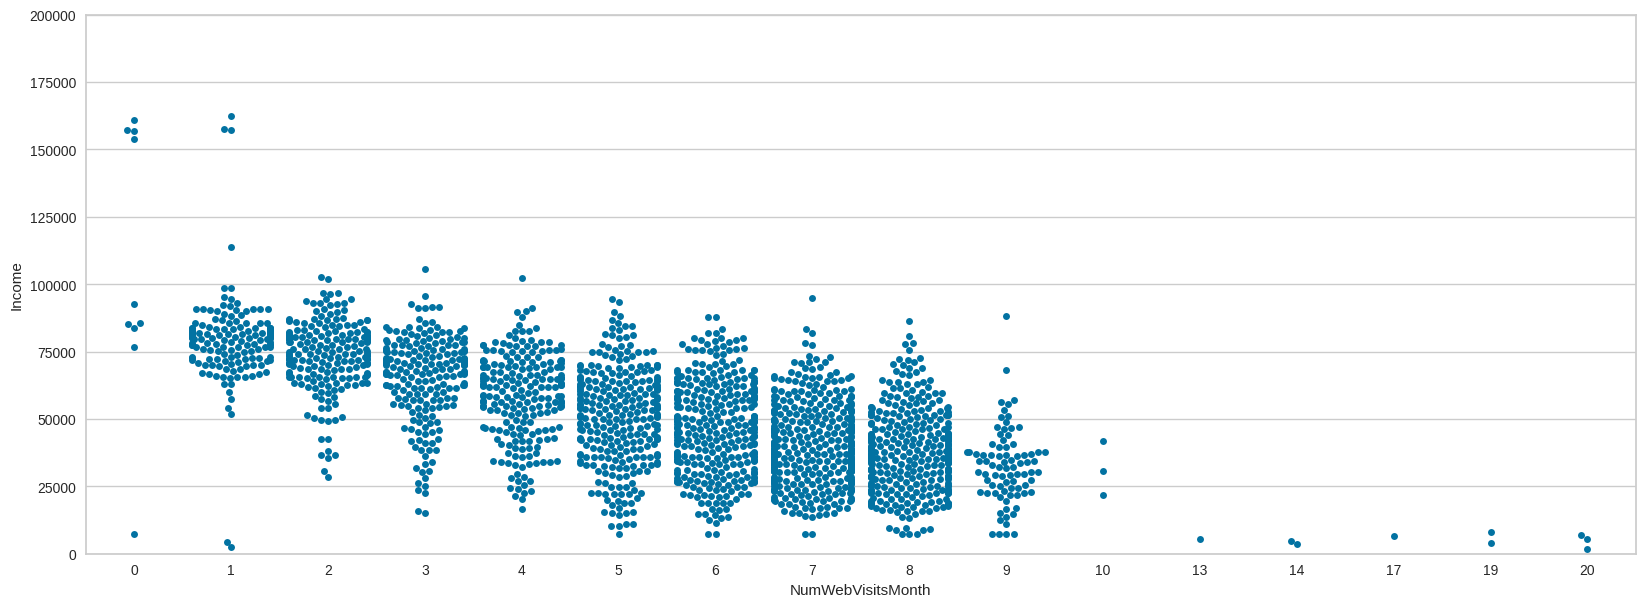

In [ ]:
plt.figure(figsize=(20,7))
sns.swarmplot(data=dr, x='NumWebVisitsMonth', y = 'Income');
plt.ylim(0,200000)

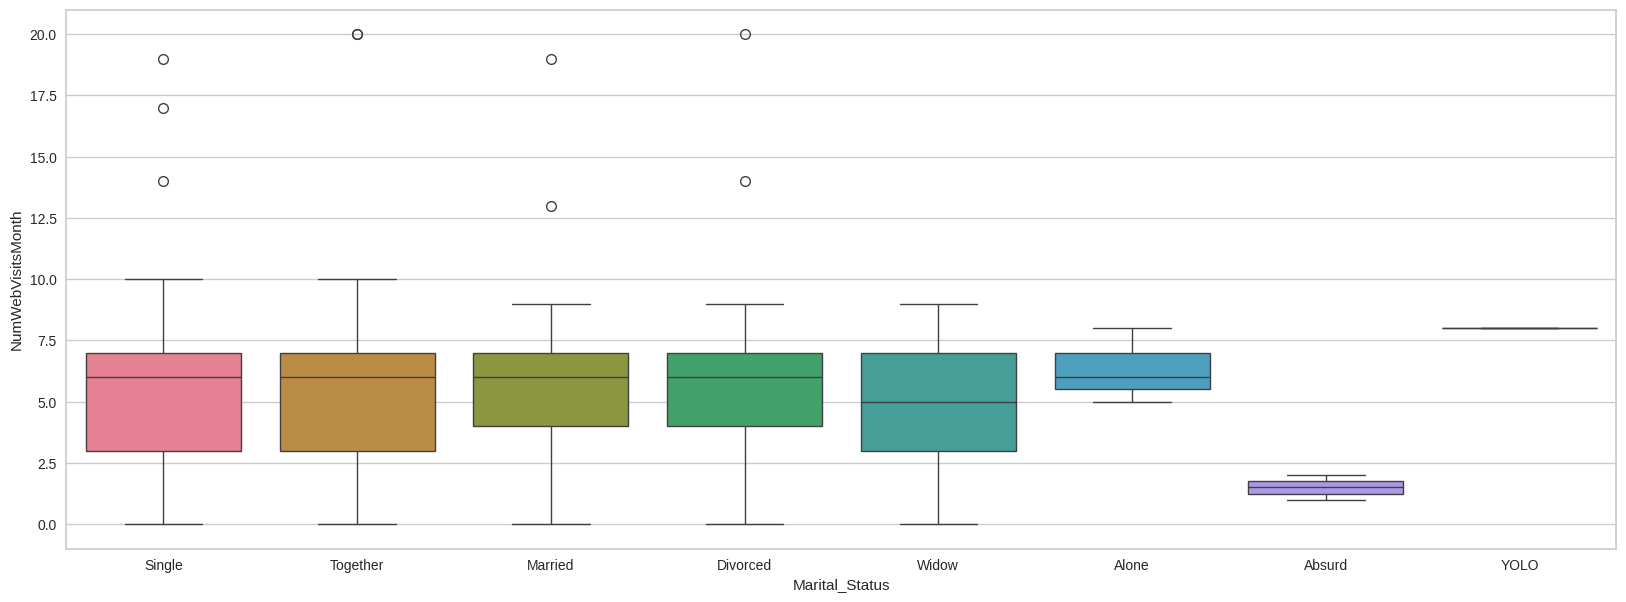

In [ ]:
plt.figure(figsize=(20,7))
sns.boxplot(data=dr, x = 'Marital_Status',  y='NumWebVisitsMonth', hue = 'Marital_Status');

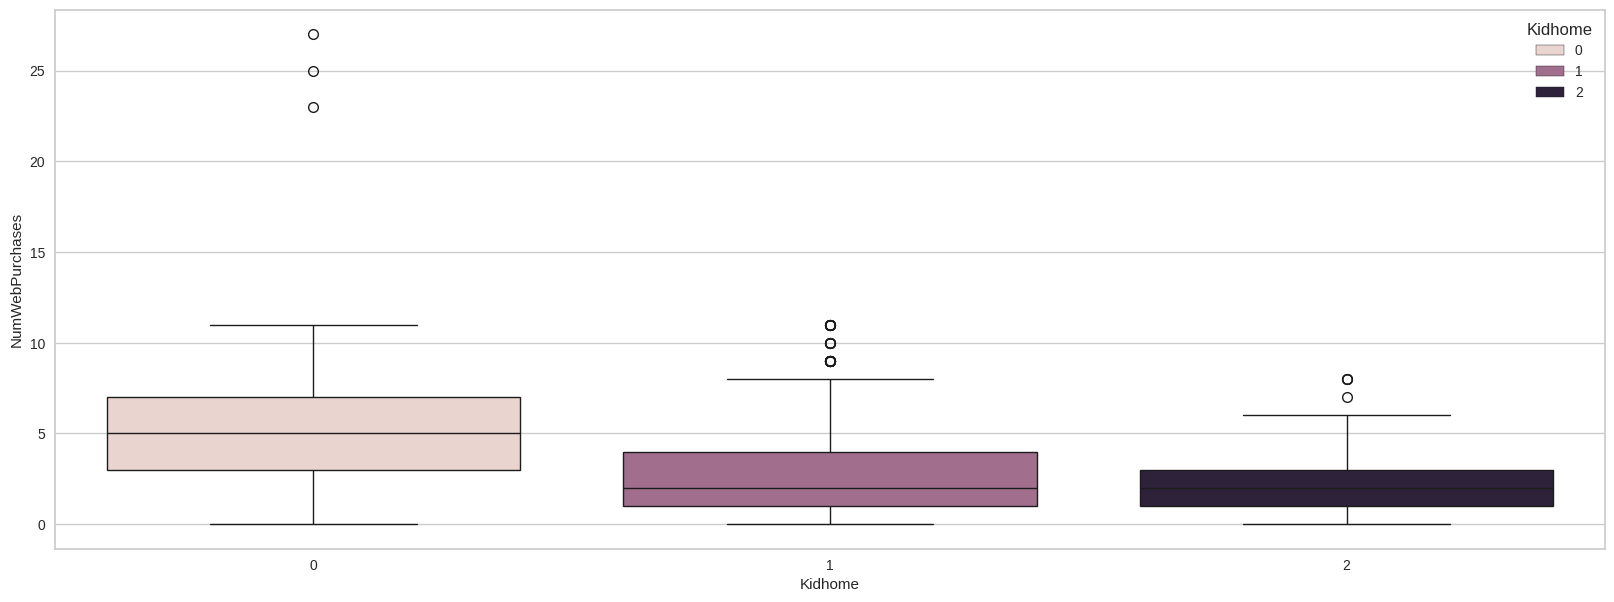

In [ ]:
plt.figure(figsize=(20,7))
sns.boxplot(data=dr, x = 'Kidhome',  y='NumWebPurchases', hue = 'Kidhome');

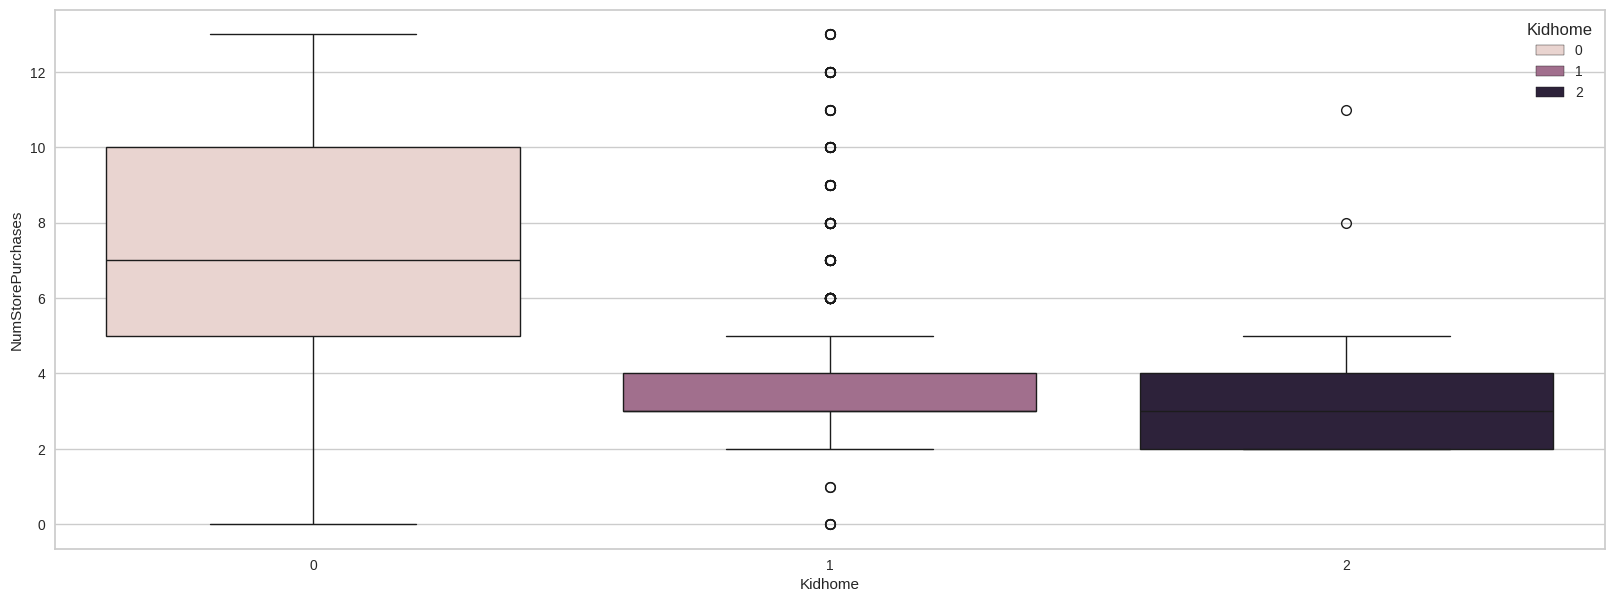

In [ ]:
plt.figure(figsize=(20,7))
sns.boxplot(data=dr, x = 'Kidhome',  y='NumStorePurchases', hue = 'Kidhome');

## **K-means Clustering**

#### Select the appropriate number of clusters using the elbow Plot.

In [ ]:
# to use k means we will adjust the categorical data

dr2_fix = pd.get_dummies(dr2, columns=['Education', 'Marital_Status'], drop_first=False)
dr2_fix = dr2_fix.astype(int)

In [ ]:
dr2_fix.head()

ID  Year_Birth  Income  Kidhome  Teenhome          Dt_Customer  Recency  \
0  5524        1957   58138        0         0  1346716800000000000       58   
1  2174        1954   46344        1         1  1394236800000000000       38   
2  4141        1965   71613        0         0  1377043200000000000       26   
3  6182        1984   26646        1         0  1391990400000000000       26   
4  5324        1981   58293        1         0  1390089600000000000       94   

   MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
0       635         88              546              172                88   
1        11          1                6                2                 1   
2       426         49              127              111                21   
3        11          4               20               10                 3   
4       173         43              118               46                27   

   MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
0            88                  3                8                   10   
1             6                  2                1                    1   
2            42                  1                8                    2   
3             5                  2                2                    0   
4            15                  5                5                    3   

   NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
0                  4                  7             0             0   
1                  2                  5             0             0   
2                 10                  4             0             0   
3                  4                  6             0             0   
4                  6                  5             0             0   

   AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  \
0             0             0             0         0              3   
1             0             0             0         0              3   
2             0             0             0         0              3   
3             0             0             0         0              3   
4             0             0             0         0              3   

   Z_Revenue  Response  yearEn  monthEn  Education_2n Cycle  Education_Basic  \
0         11         1    2012        9                   0                0   
1         11         0    2014        3                   0                0   
2         11         0    2013        8                   0                0   
3         11         0    2014        2                   0                0   
4         11         0    2014        1                   0                0   

   Education_Graduation  Education_Master  Education_PhD  \
0                     1                 0              0   
1                     1                 0              0   
2                     1                 0              0   
3                     1                 0              0   
4                     0                 0              1   

   Marital_Status_Absurd  Marital_Status_Alone  Marital_Status_Divorced  \
0                      0                     0                        0   
1                      0                     0                        0   
2                      0                     0                        0   
3                      0                     0                        0   
4                      0                     0                        0   

   Marital_Status_Married  Marital_Status_Single  Marital_Status_Together  \
0                       0                      1                        0   
1                       0                      1                        0   
2                       0                      0                        1   
3                       0                      0                        1   
4                       1                      0            

In [ ]:
dr3 = dr2_fix.copy()

In [ ]:
dr3.head()

ID  Year_Birth  Income  Kidhome  Teenhome          Dt_Customer  Recency  \
0  5524        1957   58138        0         0  1346716800000000000       58   
1  2174        1954   46344        1         1  1394236800000000000       38   
2  4141        1965   71613        0         0  1377043200000000000       26   
3  6182        1984   26646        1         0  1391990400000000000       26   
4  5324        1981   58293        1         0  1390089600000000000       94   

   MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
0       635         88              546              172                88   
1        11          1                6                2                 1   
2       426         49              127              111                21   
3        11          4               20               10                 3   
4       173         43              118               46                27   

   MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
0            88                  3                8                   10   
1             6                  2                1                    1   
2            42                  1                8                    2   
3             5                  2                2                    0   
4            15                  5                5                    3   

   NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
0                  4                  7             0             0   
1                  2                  5             0             0   
2                 10                  4             0             0   
3                  4                  6             0             0   
4                  6                  5             0             0   

   AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  \
0             0             0             0         0              3   
1             0             0             0         0              3   
2             0             0             0         0              3   
3             0             0             0         0              3   
4             0             0             0         0              3   

   Z_Revenue  Response  yearEn  monthEn  Education_2n Cycle  Education_Basic  \
0         11         1    2012        9                   0                0   
1         11         0    2014        3                   0                0   
2         11         0    2013        8                   0                0   
3         11         0    2014        2                   0                0   
4         11         0    2014        1                   0                0   

   Education_Graduation  Education_Master  Education_PhD  \
0                     1                 0              0   
1                     1                 0              0   
2                     1                 0              0   
3                     1                 0              0   
4                     0                 0              1   

   Marital_Status_Absurd  Marital_Status_Alone  Marital_Status_Divorced  \
0                      0                     0                        0   
1                      0                     0                        0   
2                      0                     0                        0   
3                      0                     0                        0   
4                      0                     0                        0   

   Marital_Status_Married  Marital_Status_Single  Marital_Status_Together  \
0                       0                      1                        0   
1                       0                      1                        0   
2                       0                      0                        1   
3                       0                      0                        1   
4                       1                      0            

In [ ]:
dr3 = dr3.drop(['ID', 'Dt_Customer'], axis=1)

In [ ]:
dr3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 40 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Year_Birth               2216 non-null   int64
 1   Income                   2216 non-null   int64
 2   Kidhome                  2216 non-null   int64
 3   Teenhome                 2216 non-null   int64
 4   Recency                  2216 non-null   int64
 5   MntWines                 2216 non-null   int64
 6   MntFruits                2216 non-null   int64
 7   MntMeatProducts          2216 non-null   int64
 8   MntFishProducts          2216 non-null   int64
 9   MntSweetProducts         2216 non-null   int64
 10  MntGoldProds             2216 non-null   int64
 11  NumDealsPurchases        2216 non-null   int64
 12  NumWebPurchases          2216 non-null   int64
 13  NumCatalogPurchases      2216 non-null   int64
 14  NumStorePurchases        2216 non-null   int64
 15  NumWebVis

In [ ]:
scaler = StandardScaler()
cont_feats = ['Income', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds', 'Year_Birth', 'yearEn', 'Recency', 'NumWebPurchases',
              'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'NumDealsPurchases']
dr3[cont_feats] = scaler.fit_transform(dr3[cont_feats])

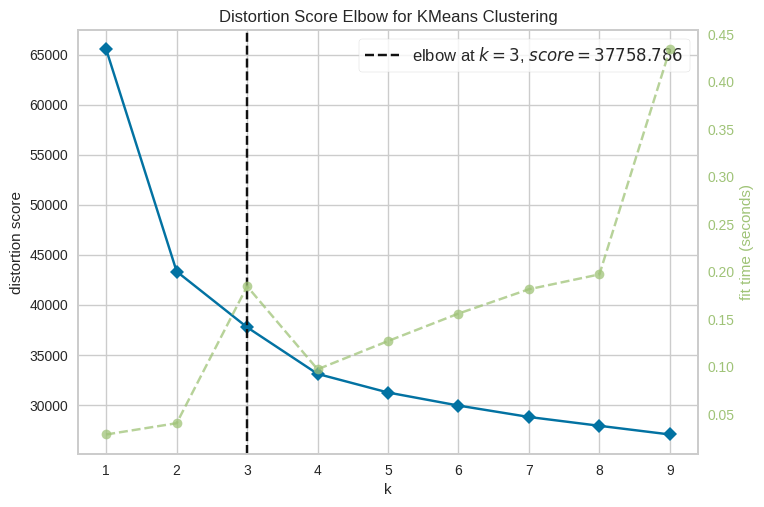

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
kmeans = KMeans(init='k-means++', n_init=10, random_state=42)
visualizer = KElbowVisualizer(kmeans, k=(1,10))
visualizer.fit(dr3)
visualizer.show()

#### finalize appropriate number of clusters by checking the silhoutte score as well. See if the answer different from the elbow plot.

In [ ]:
kmeans2 = KMeans(n_clusters=3, random_state=42)
kmeans2.fit(dr3)
labels = kmeans2.labels_
sil = silhouette_score(dr3, labels)
print(f"Silhouette Score: {sil}")

Silhouette Score: 0.24161692099162185


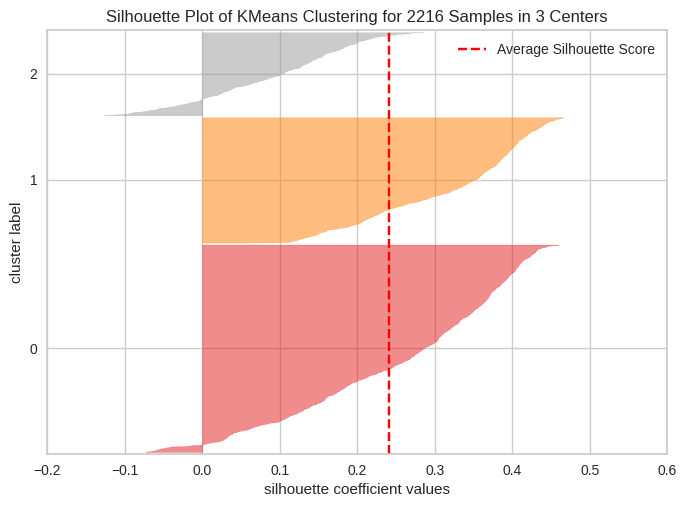

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 2216 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
visualizer2 = SilhouetteVisualizer(kmeans2)

visualizer2.fit(dr3)
visualizer2.show()

This is not a particularly a great score, we could do better - our categorial and dsicrete numerical features definitely impacted our results

#### Do a final fit with the appropriate number of clusters and see how much total time does it take for the model to fit the data

In [ ]:
start_time = time.time()
kmeans3 = KMeans(n_clusters=3, random_state=42)
kmeans3.fit(dr3)
end_time = time.time()
tot_time = end_time - start_time
print(f"Total time: {tot_time:.4f} seconds")
kmeans3_labels = kmeans3.fit_predict(dr3)

Total time: 0.0238 seconds


## **Hierarchical Clustering**

#### Calculate the cophnetic correlation for every combination of distance metrics and linkage and see which combination has the highest cophnetic correlation.

In [ ]:
distance_metrics = ['euclidean', 'cityblock', 'cosine', 'correlation', 'hamming', 'jaccard', 'minkowski',
                    'chebyshev', 'sqeuclidean', 'braycurtis', 'canberra']
linkage_methods = ['single', 'complete', 'average', 'ward', 'centroid', 'median', 'weighted']

analysis = []

for metric in distance_metrics:
  for linkage_method in linkage_methods:
    d_mat = pdist(dr3, metric=metric)
    result = linkage(d_mat, method=linkage_method)
    coph_corr, _ = cophenet(result, d_mat)
    analysis.append({
            'Distance Metric': metric,
            'Linkage Method': linkage_method,
            'Cophenetic Correlation': coph_corr
        })

analysis_dr = pd.DataFrame(analysis)

combo = analysis_dr.loc[analysis_dr['Cophenetic Correlation'].idxmax()]

print(f"Best combination: Distance Metric = {combo['Distance Metric']}, "
      f"Linkage Method = {combo['Linkage Method']}, "
      f"Cophenetic Correlation = {combo['Cophenetic Correlation']:.4f}")

Best combination: Distance Metric = canberra, Linkage Method = average, Cophenetic Correlation = 0.7723


#### plot the dendogram for every linkage method with "Euclidean" distance only and see what should be the appropriate linkage according to the plot

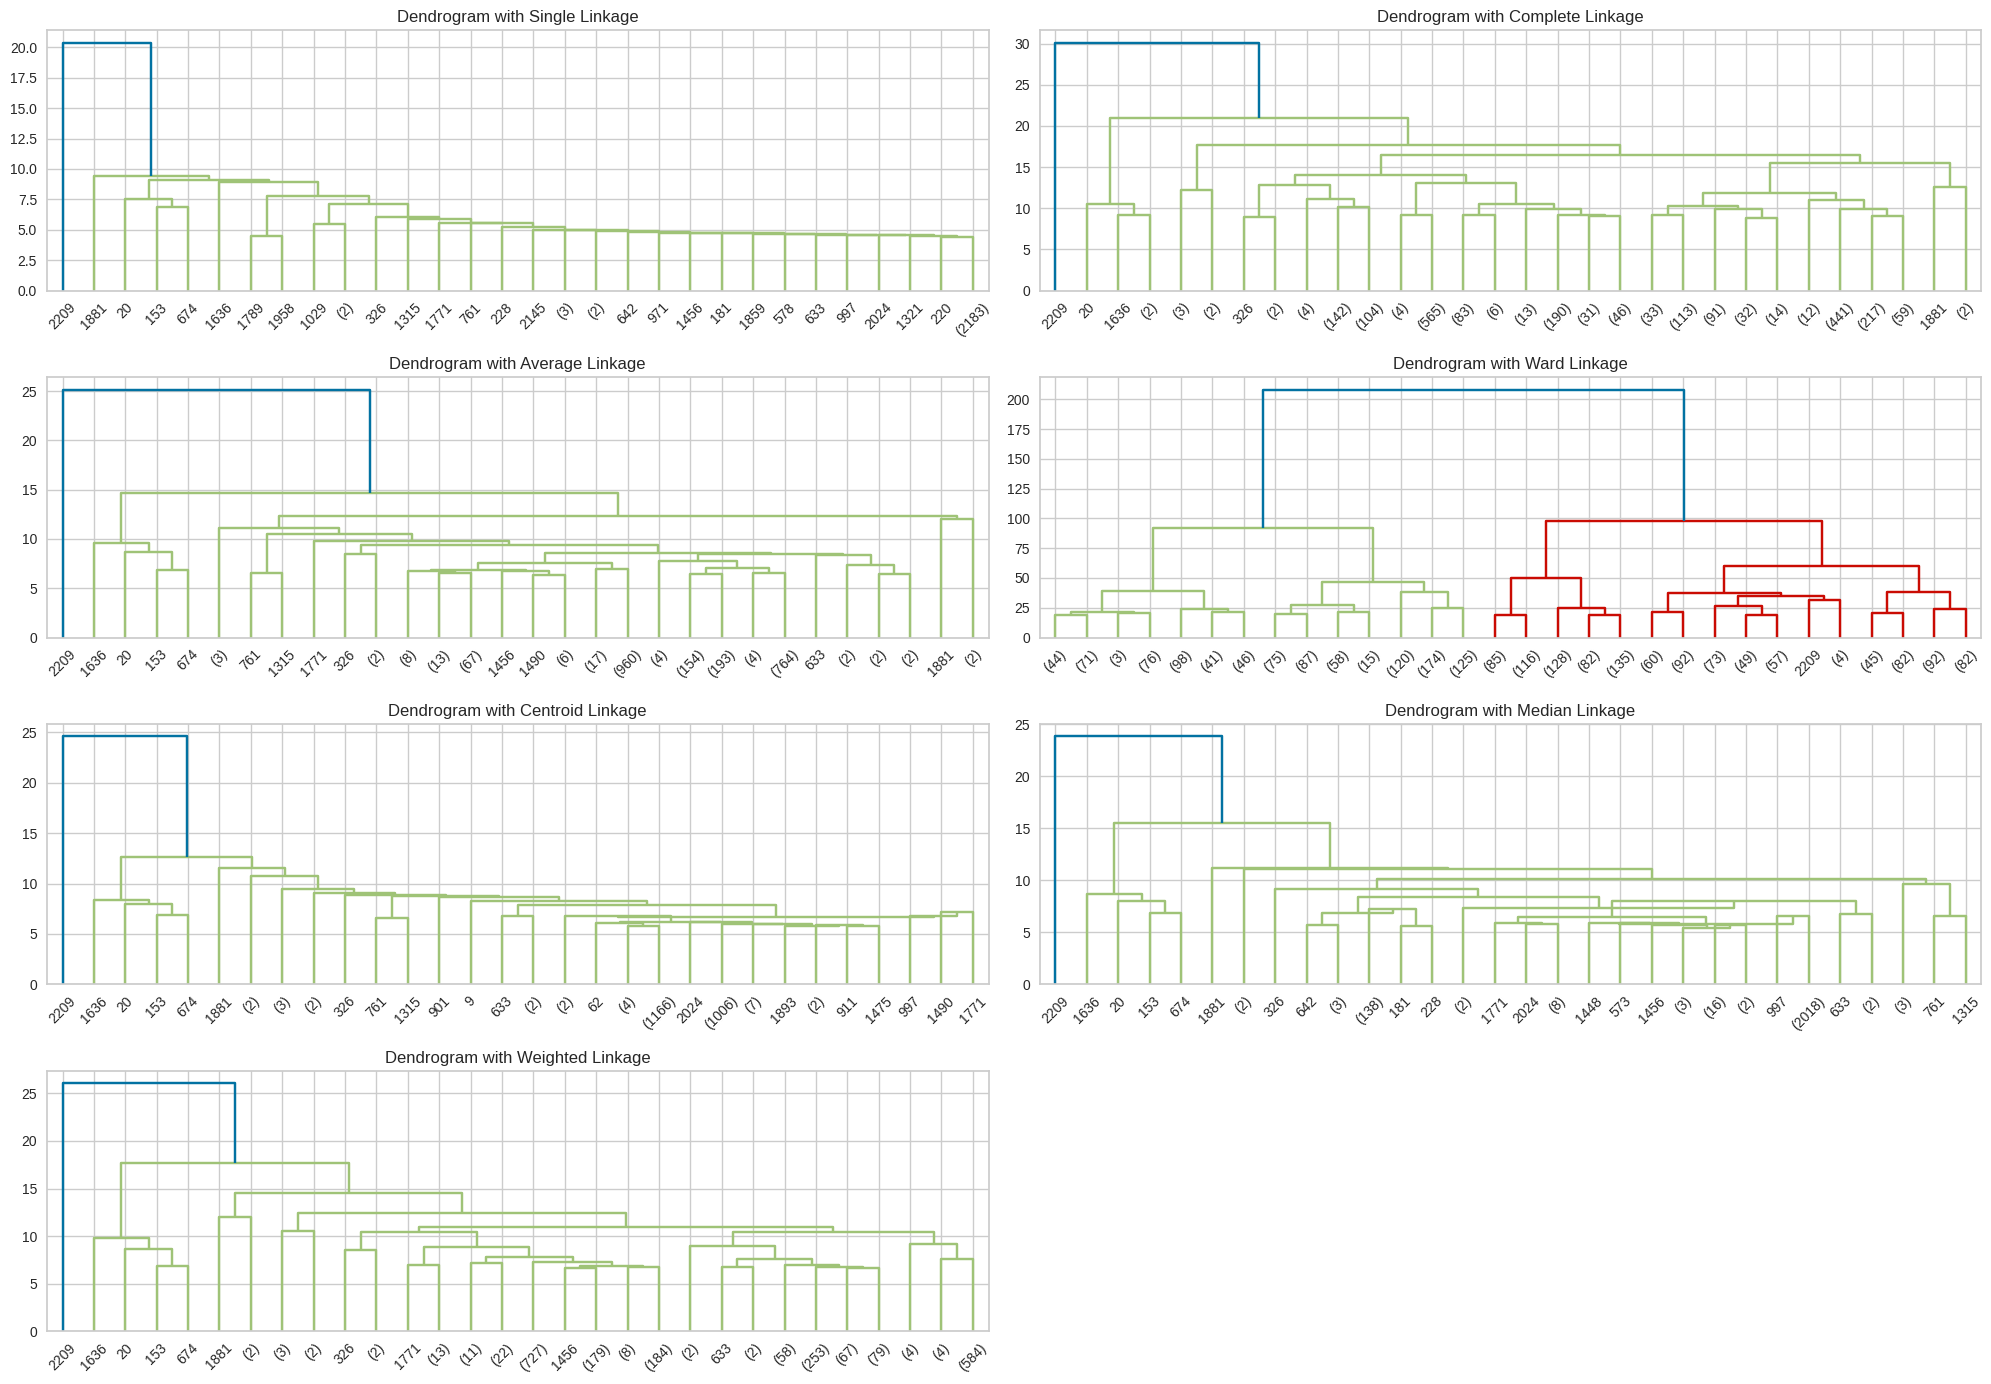

In [ ]:
plt.figure(figsize=(20, 14))



for i, method in enumerate(linkage_methods):
    plt.subplot(4, 2, i+1)
    result = linkage(dr3, method=method, metric='euclidean')
    dendrogram(result, truncate_mode = 'lastp', p=30)
    plt.title(f"Dendrogram with {method.capitalize()} Linkage")

plt.tight_layout()
plt.show()

Ward linkage seems to be the best fit

#### Check the silhoutte score for the hierchial clustering and see what should be the appropriate number of clusters according to this plot

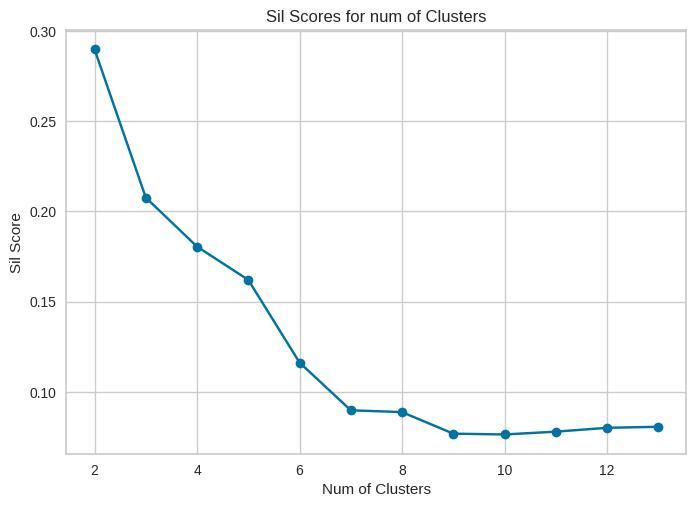

Best number of clusters: 2 with silhouette score: 0.28974137143541323


In [ ]:
clusters = range(2, 14)
sil_scores = []
for cl in clusters:
  agclus = AgglomerativeClustering(n_clusters=cl, metric='euclidean', linkage='ward')
  cl_labels = agclus.fit_predict(dr3)
  score = silhouette_score(dr3, cl_labels)
  sil_scores.append(score)

plt.plot(clusters, sil_scores, marker='o')
plt.title('Sil Scores for num of Clusters')
plt.xlabel('Num of Clusters')
plt.ylabel('Sil Score')
plt.show()

bclus = clusters[np.argmax(sil_scores)]
bscore = max(sil_scores)
print(f"Best number of clusters: {bclus} with silhouette score: {bscore}")

#### Fit the Hierarchial clustering model with the appropriate parameters finalized above and see how much time it takes to fit the model.

In [ ]:
start_time2 = time.time()
agclus2 = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
agclus2.fit(dr3)
end_time2 = time.time()
tot_time2 = end_time2 - start_time2
print(f"Time taken to fit the Agglomerative Clustering model: {tot_time2:.4f} seconds")
agclus_labels = agclus2.fit_predict(dr3)

Time taken to fit the Agglomerative Clustering model: 0.1912 seconds


## **Cluster Profiling and Comparison**

### K-Means Clustering vs Hierarchical Clustering Comparison

#### Perform and compare Cluster profiling on both algorithms using boxplots. Based on the all the observaions see which one of them provides better clustering.

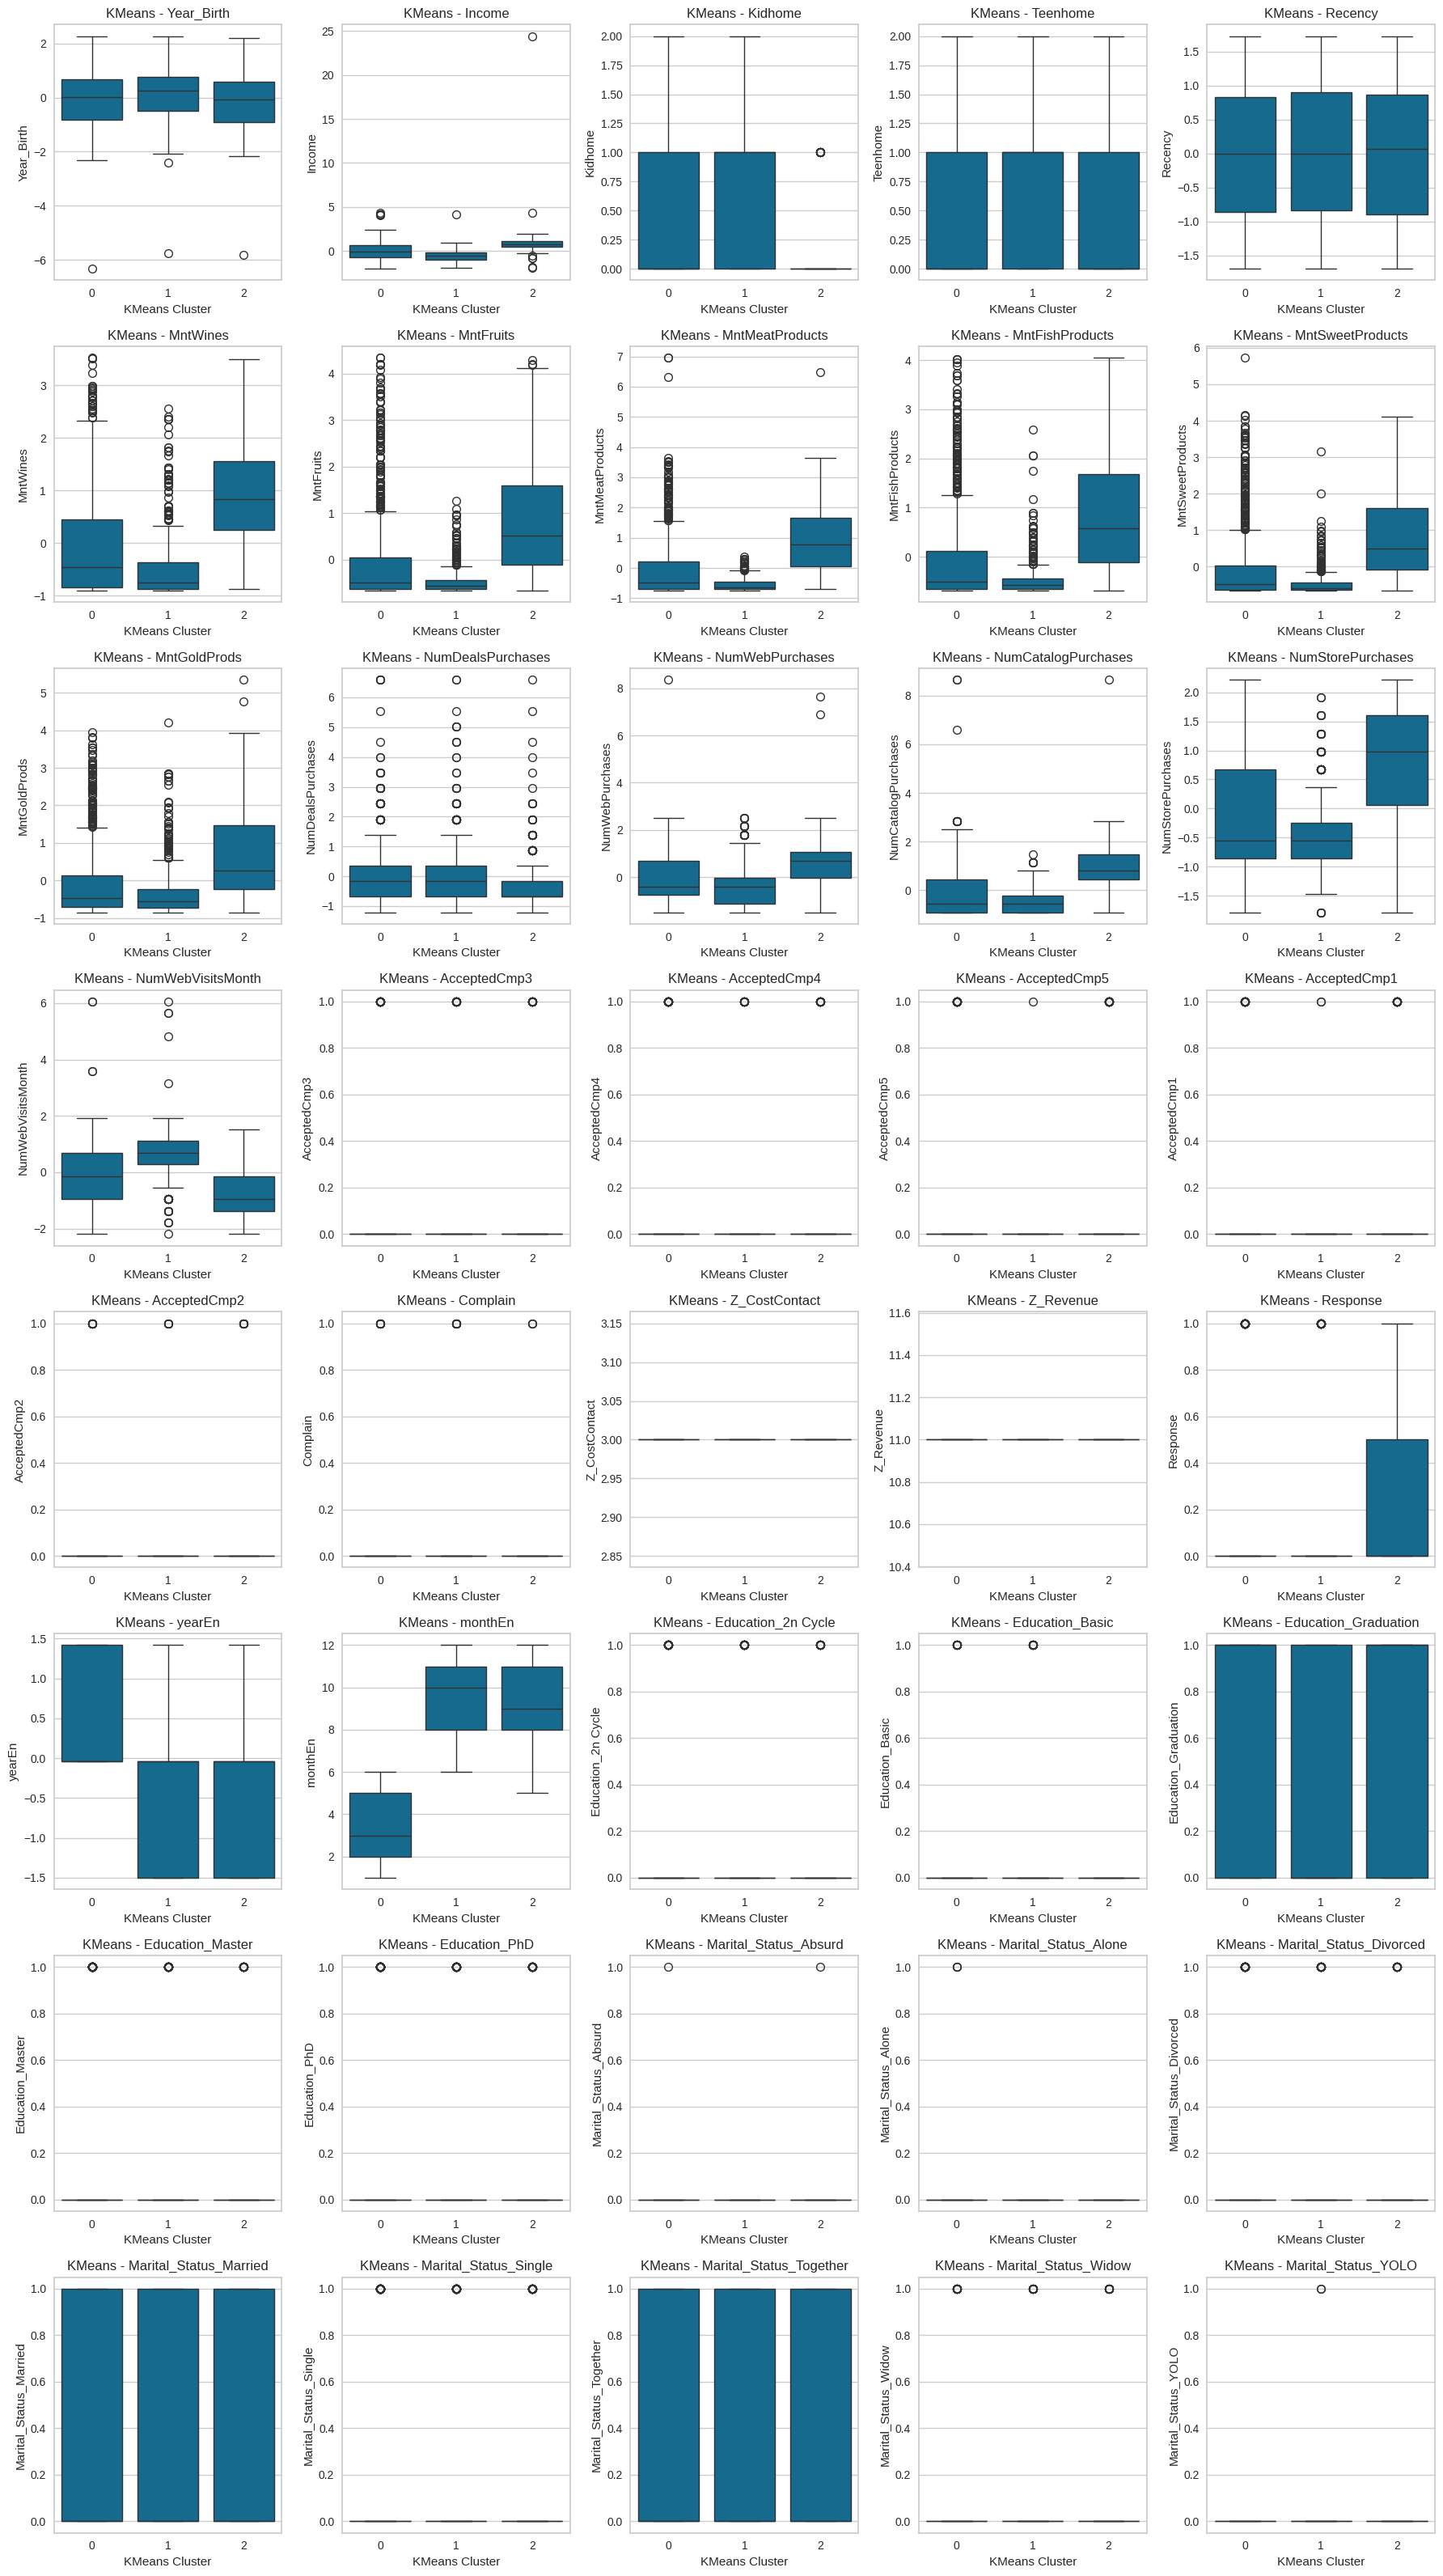

In [ ]:
drfin_kmeans = dr3.copy()
drfin_kmeans['KMeans Cluster'] = kmeans3_labels

dr_ag = dr3.copy()
dr_ag['Agglomerative Cluster'] = agclus_labels

fig, axes = plt.subplots(8, 5, figsize=(18, 32))
axes = axes.flatten()


for i,col in enumerate(drfin_kmeans.columns[:-1]):
  if i < len(axes):
    sns.boxplot(x='KMeans Cluster', y=col, data=drfin_kmeans, ax=axes[i])
    axes[i].set_title(f"KMeans - {col}")
  else:
    break


plt.tight_layout()

plt.show();

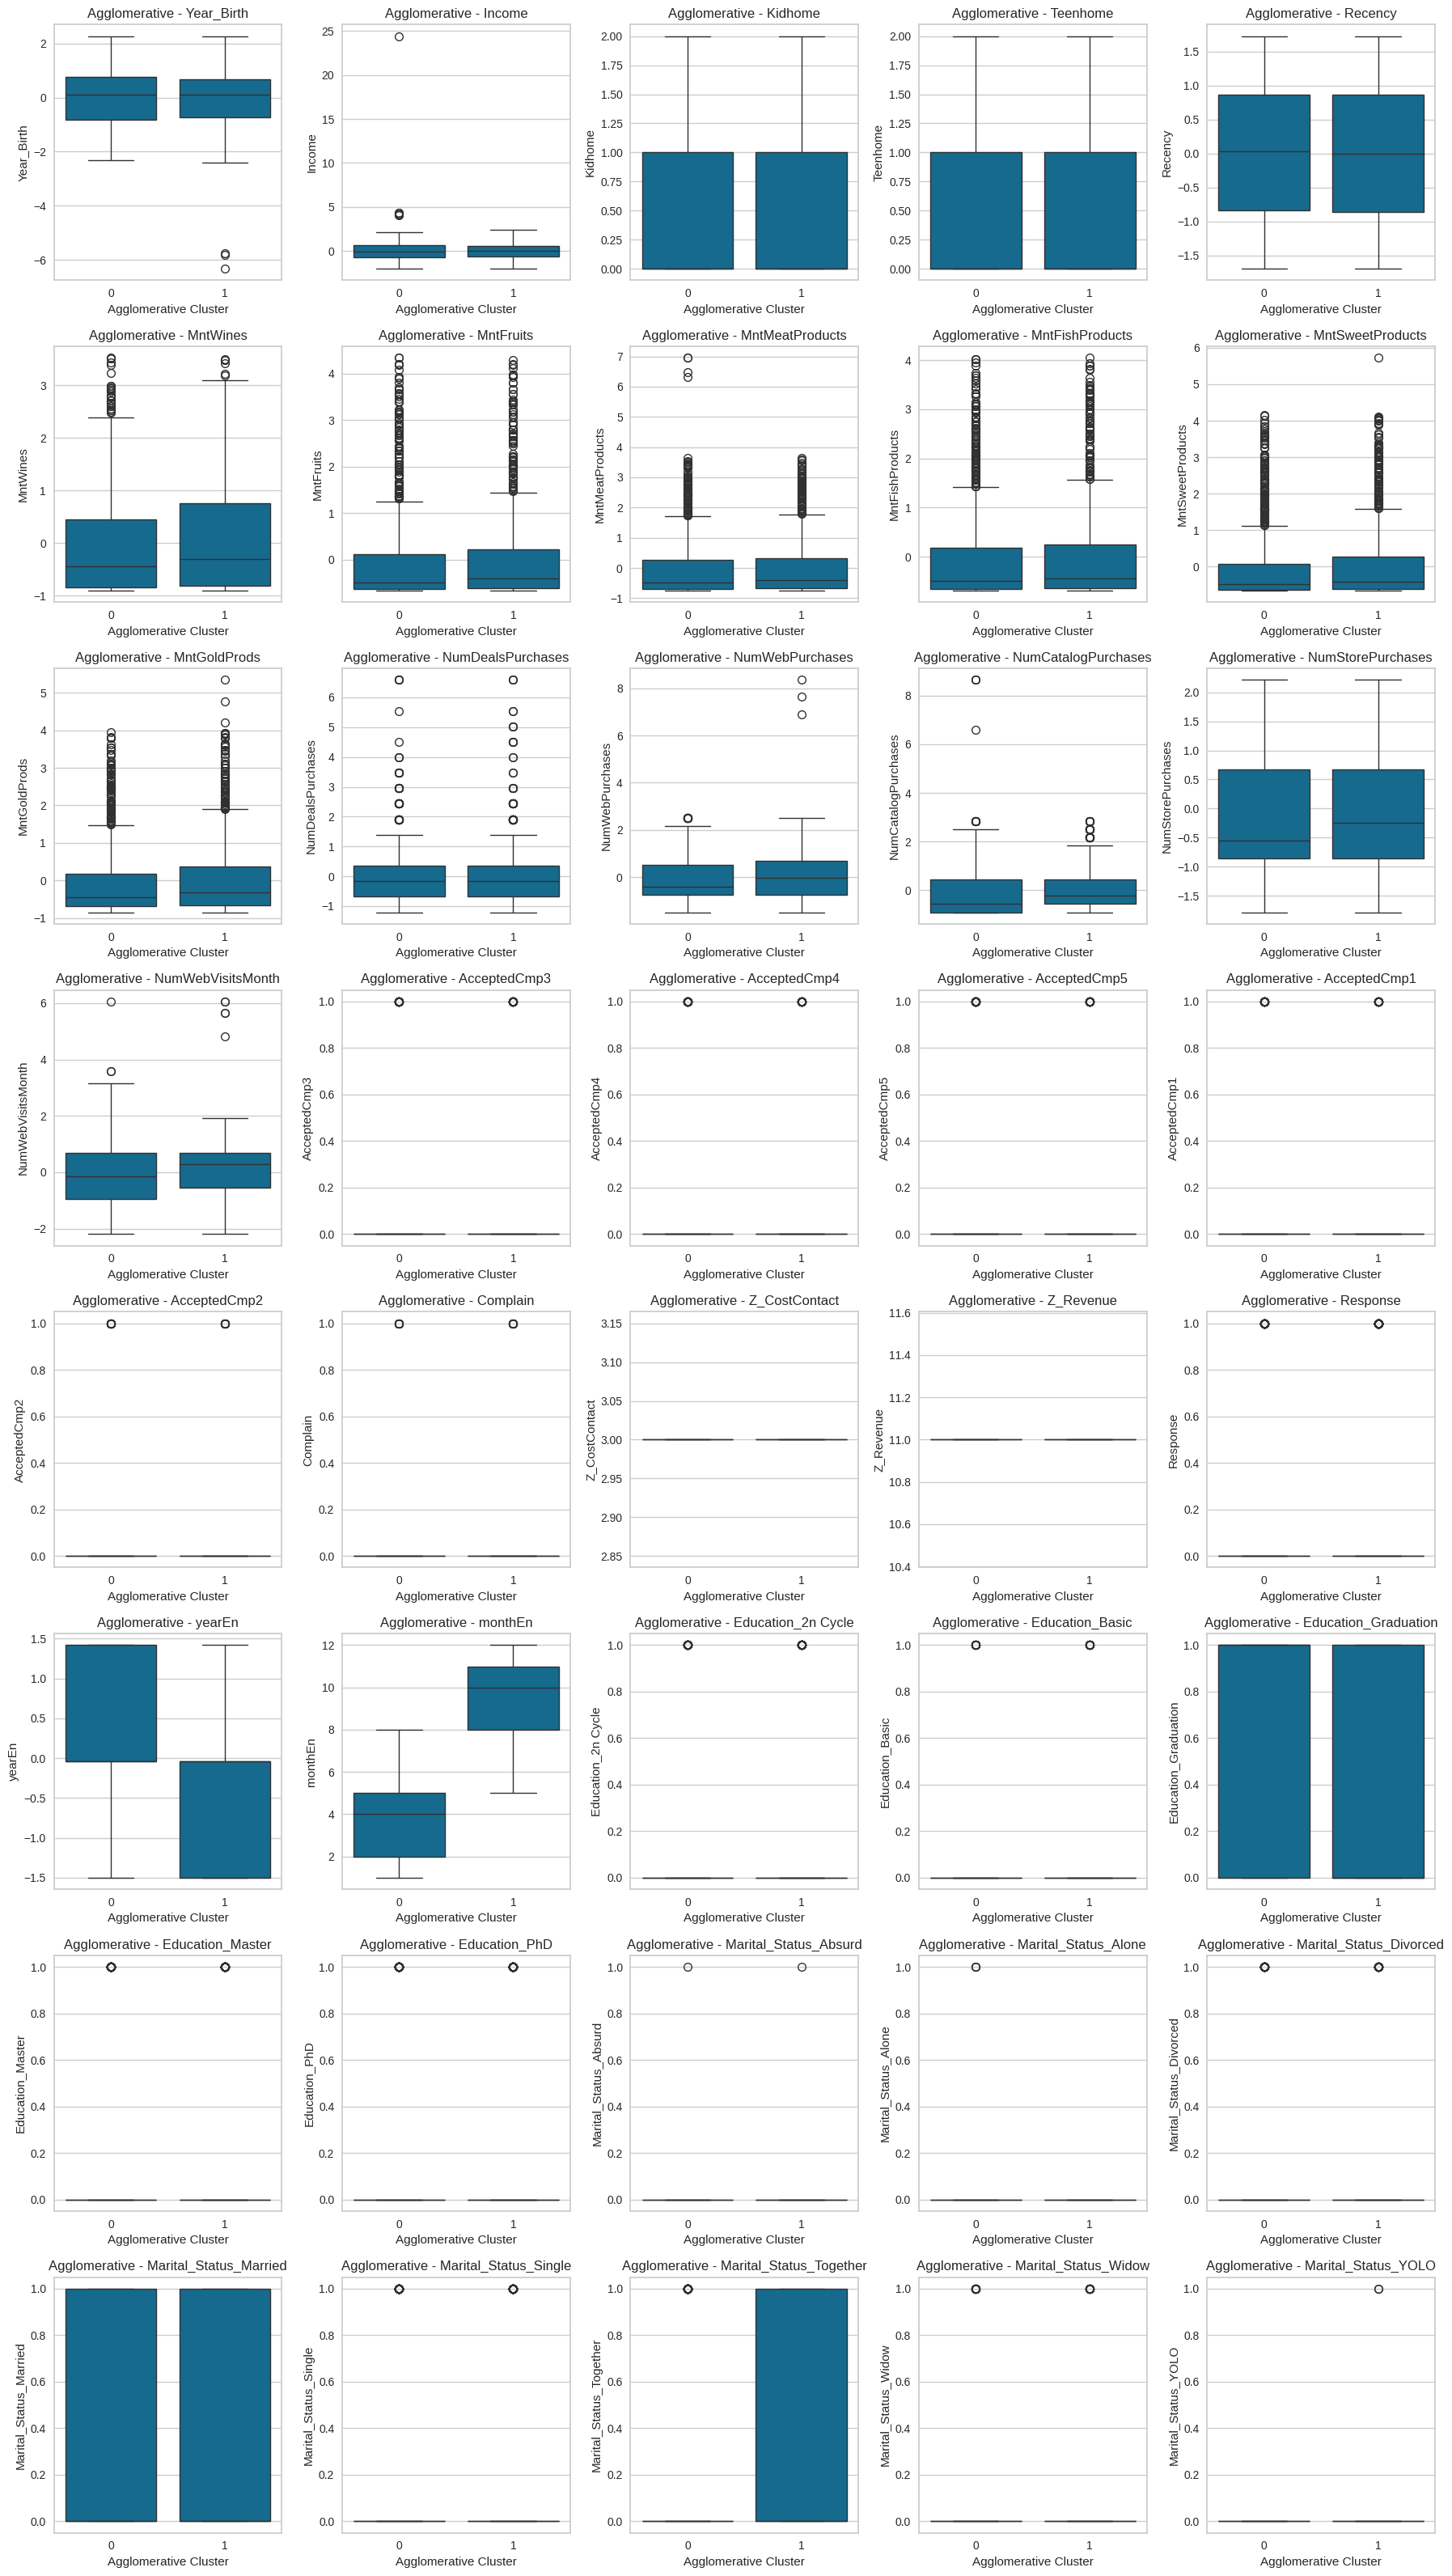

In [ ]:
fig, axes = plt.subplots(8, 5, figsize=(18, 32))
axes = axes.flatten()

for i, col in enumerate(dr_ag.columns[:-1]):
  if i < 40:
    sns.boxplot(x='Agglomerative Cluster', y=col, data=dr_ag, ax=axes[i])
    axes[i].set_title(f"Agglomerative - {col}")
  else:
    break


plt.tight_layout()
plt.show()

The box plots for k means are more diverse, i.e. not similar which indicates it was a better algorithm.

#### Perform Cluster profiling on the data with the appropriate algorithm determined above using a barplot and see what observations can be derived for each cluster from this plot.

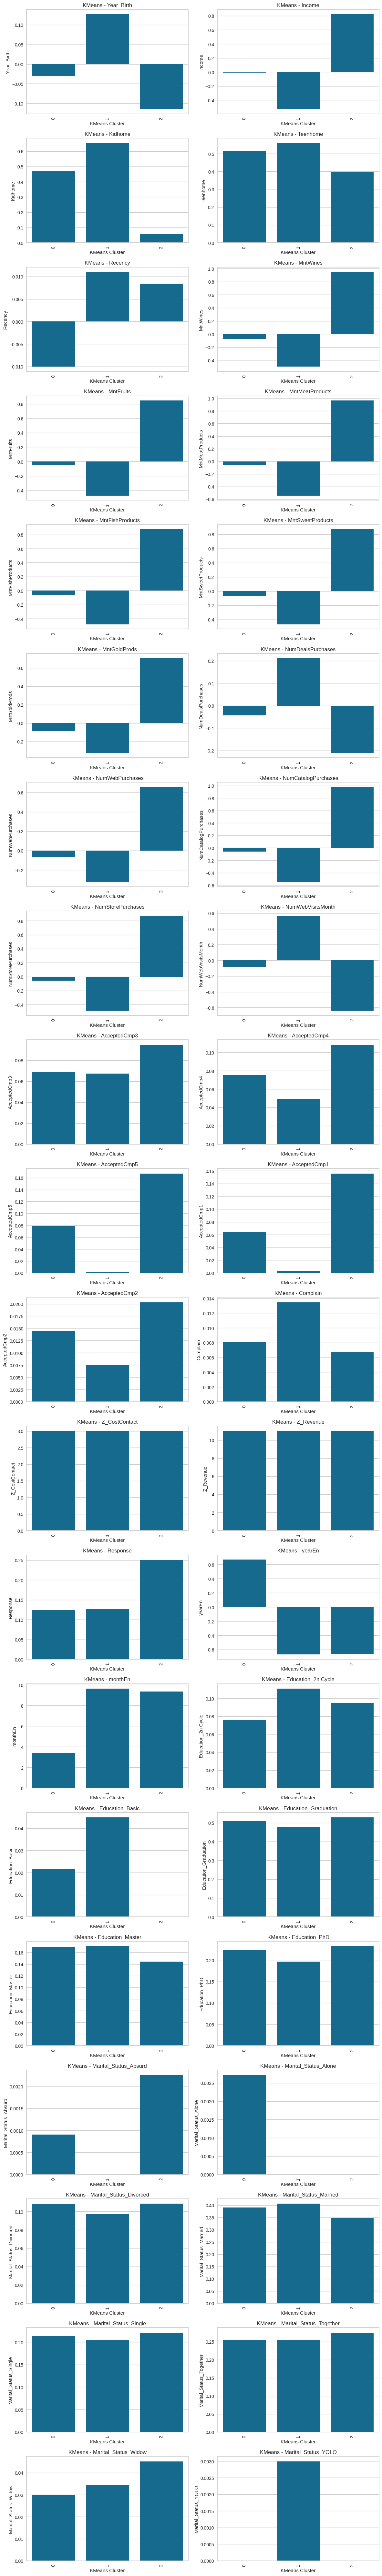

In [ ]:
fig, axes = plt.subplots(20, 2, figsize=(12, 80))
axes = axes.flatten()

for i, col in enumerate(drfin_kmeans.columns[:-1]):
  if i < len(axes):
    sns.barplot(x='KMeans Cluster', y=col, data=drfin_kmeans, ax=axes[i], ci=None)
    axes[i].set_title(f'KMeans - {col}')
    axes[i].tick_params(axis='x', rotation=90)
  else:
    break

plt.tight_layout()
plt.show()

bar grpahs that vary more across the clusters indicate that that specific feature is important in distinguishing clsuters/data - for exampple, income and birth year. Bar graphs that are the same across the clusters indicate that feature is not that improtant.